<a href="https://colab.research.google.com/github/Andarsan/cow/blob/main/github_cow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Коровы на продажу


 Нужно разработать модель машинного обучения, которая поможет управлять рисками и принимать объективное решение о покупке коров.

 Для этого «ЭкоФерма» предоставила подробные данные о своих коровах.

 Ссоздим две прогнозные модели для отбора бурёнок в поголовье:

* первая будет прогнозировать возможный удой коровы (целевой признак Удой)
* вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус_молока).

* файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент.

|||
|:-|:-|
|id| — уникальный идентификатор коровы.|
|Удой,_кг| — масса молока, которую корова даёт в год (в килограммах).|
|ЭКЕ_(Энергетическая_кормовая_единица)| — показатель питательности корма коровы.|
|Сырой_протеин, г| — содержание сырого протеина в корме (в граммах).|
|СПО_(Сахаро-протеиновое_соотношение)| — отношение сахара к протеину в корме коровы.|
|Порода| — порода коровы.|
|Тип_пастбища| — ландшафт лугов, на которых паслась корова.|
|порода_папы_быка| — порода папы коровы.|
|Жирность,%| — содержание жиров в молоке (в процентах).|
|Белок,%| — содержание белков в молоке (в процентах)|
|Вкус_молока| — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).|
|Возраст| — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).|

* файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера.


|||
|:-|:-|
|id| — уникальный идентификатор коровы.|
|Имя Папы| — имя папы коровы.|

* файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.


|||
|:-|:-|
|Порода| — порода коровы.|
|Тип_пастбища| — ландшафт лугов, на которых паслась корова.|
|порода_папы_быка| — порода папы коровы.|
|Имя_папы| — имя папы коровы.|
|Текущая_жирность,%| — содержание жиров в молоке (в процентах)|
|Текущий_уровень_белок,%| — содержание белков в молоке (в процентах).|
|Возраст| — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).|


## Загрузка данных

In [154]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math
import random
import seaborn as sns
import scipy.stats as st
#from google.colab import drive
#drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
# кодировать категории [0,1,0,0,0]
from sklearn.preprocessing import OneHotEncoder
# создать матрицу с цифарками (стардатизация)
from sklearn.preprocessing import StandardScaler
# ищет линейную зависимость от всех значений во всех колонках к одному значению y
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# оценка качества классификации
from sklearn.metrics import accuracy_score
# показывает точность, с которой модель предскажет что молоко вкусное
from sklearn.metrics import precision_score
# или не вкусное
from sklearn.metrics import recall_score
# матрица ошибок
from sklearn.metrics import confusion_matrix

#tim_taxi
import warnings
warnings.filterwarnings("ignore")
try:
    from google.colab import drive
    drive.mount('/content/drive')
except Exception as ex:
    template = "An exception of type {0} occurred. Arguments:\n{1!r}"
    message = template.format(type(ex).__name__, ex.args)
    print(message)
import os
import time
import copy

#Avto_price_final
! pip install phik
# Вычисление матрицы корреляции с использованием phik
import phik

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
import nltk
import sklearn
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The nltk version is 3.8.1.
The scikit-learn version is 1.5.2.


In [156]:

def df_plt_describe(_df,_for,describe=False):
    for i in _for:
        j=0
        for _ in range(1):
            if _df[i].dtype != 'object':
                # Set up the plot
                ax = plt.subplot(2, 2, j + 1)
                j = j+1
                # Draw the plot
                ax.boxplot(_df[i])
                # Title and labels
                ax.set_title(i)
                ax = plt.subplot(2, 2, j + 1)
                j = j+1
                # Draw the plot
                ax.hist(_df[i])
                # Title and labels
                ax.set_title(i)
        plt.tight_layout()
        plt.show()
        plt.close()
    if describe:
        display(_df[_for].describe())


In [157]:
pth1 = '/datasets'#/ferma_main.csv'
pth2 = '/content/drive/MyDrive/Colab Notebooks/all_project'#/ferma_main.csv'
pth3 = 'C:/Users/andar/Downloads'
if os.path.exists(pth1):
  pth = pth1
elif os.path.exists(pth2):
  pth = pth2
elif os.path.exists(pth3):
  pth = pth3
else:
  pth = 'Something is wrong'
display(f'рабочий каталог: {pth}')

'рабочий каталог: /content/drive/MyDrive/Colab Notebooks/all_project'

In [158]:
df_cow = pd.read_csv(pth + '/ferma_main.csv', sep=';',decimal=',')
display(df_cow.head(5))
df_cow.info()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [159]:
df_dad = pd.read_csv(pth + '/ferma_dad.csv', sep=';',decimal=',')
display(df_dad.head(5))
df_dad.info()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [160]:
df_buy = pd.read_csv(pth + '/cow_buy.csv', sep=';',decimal=',')
display(df_buy.head(5))
df_buy.info()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


##  Предобработка данных

### `ferma_main.csv`

In [161]:
 df_cow.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [162]:
_new =[]
for _i in df_cow.columns:
  _new.append(_i.replace(' ','_'))
df_cow.columns = _new
df_cow = df_cow.rename(columns = {'порода_папы_быка':'Порода_папы_быка'})
df_cow.columns

Index(['id', 'Удой,_кг', 'ЭКЕ_(Энергетическая_кормовая_единица)',
       'Сырой_протеин,_г', 'СПО_(Сахаро-протеиновое_соотношение)', 'Порода',
       'Тип_пастбища', 'Порода_папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус_молока', 'Возраст'],
      dtype='object')

In [163]:
df_cow.duplicated().sum()

5

In [164]:
df_cow.drop_duplicates(keep='first',inplace=True)
df_cow.duplicated().sum()

0

In [165]:
df_cow['id'].duplicated().sum()

0

In [166]:
df_cow['Вкус_молока'] = df_cow['Вкус_молока'].apply(lambda x: True if x == 'вкусно' else False ).astype('bool')
df_cow['Вкус_молока'].unique()

array([ True, False])

In [167]:
df_cow['Возраст'] = df_cow['Возраст'].apply(lambda x: True if x == 'более_2_лет' else False ).astype('bool')
df_cow['Возраст'].unique()

array([ True, False])

In [168]:
_for = ['Порода','Тип_пастбища', 'Порода_папы_быка','Вкус_молока', 'Возраст']
for _i in _for:
  display(df_cow[_i].value_counts())
  display(f'-----------------------------')


,count
Порода,
Вис Бик Айдиал,373
РефлешнСоверинг,256


'-----------------------------'

,count
Тип_пастбища,
Холмистое,351
Равнинное,253
Равнинные,25


'-----------------------------'

,count
Порода_папы_быка,
Соверин,311
Айдиал,240
Айдиалл,78


'-----------------------------'

,count
Вкус_молока,
True,371
False,258


'-----------------------------'

,count
Возраст,
True,519
False,110


'-----------------------------'

In [169]:
df_cow['Тип_пастбища'] = df_cow['Тип_пастбища'].replace('Равнинные', 'равнинное', regex = True)
df_cow['Тип_пастбища'] = df_cow['Тип_пастбища'].replace('Равнинное', 'равнинное', regex = True)
df_cow['Тип_пастбища'] = df_cow['Тип_пастбища'].replace('Холмистое', 'холмистое', regex = True)
df_cow['Порода_папы_быка'] = df_cow['Порода_папы_быка'].replace('Айдиалл', 'Айдиал', regex = True)

In [170]:
_for = ['Порода','Тип_пастбища', 'Порода_папы_быка']
for _i in _for:
    df_cow[_i] = df_cow[_i].astype('category')

In [171]:
df_cow.head(5)
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     629 non-null    int64   
 1   Удой,_кг                               629 non-null    int64   
 2   ЭКЕ_(Энергетическая_кормовая_единица)  629 non-null    float64 
 3   Сырой_протеин,_г                       629 non-null    int64   
 4   СПО_(Сахаро-протеиновое_соотношение)   629 non-null    float64 
 5   Порода                                 629 non-null    category
 6   Тип_пастбища                           629 non-null    category
 7   Порода_папы_быка                       629 non-null    category
 8   Жирность,%                             629 non-null    float64 
 9   Белок,%                                629 non-null    float64 
 10  Вкус_молока                            629 non-null    bool    
 11

* в названииях колонк заменили пробел на _
* удалили дубликаты
* типерь все коровы уникальны
* поменяли тип данных в поле `Вкус_молока`на `bool` вкусно = True
* поменяли тип данных в поле `Возраст`на `bool` более _ 2 _ лет = True
* удалили неявные дубликаты
* `['Порода','Тип_пастбища', 'порода_папы_быка']` зделали из них `category` тип данных

### `ferma_dad`

In [172]:
df_dad.columns

Index(['id', 'Имя Папы'], dtype='object')

In [173]:
df_dad = df_dad.rename(columns = {'Имя Папы':'Имя_папы'})
df_dad.columns

Index(['id', 'Имя_папы'], dtype='object')

In [174]:
df_dad.duplicated().sum()

0

In [175]:
df_dad['Имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [176]:
df_dad['Имя_папы'] = df_dad['Имя_папы'].astype('category')

In [177]:
df_dad.head(5)
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        629 non-null    int64   
 1   Имя_папы  629 non-null    category
dtypes: category(1), int64(1)
memory usage: 5.9 KB


* в названиии колонки заменили пробел на _
* все папы уникальны всего 4 папы
* `['Имя_папы']` зделали `category` тип данных

### `cow_buy`

In [178]:
df_buy.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

In [179]:
_new =[]
for _i in df_buy.columns:
  _new.append(_i.replace(' ','_'))
df_buy.columns = _new
# привидём к одинаковому названию как и у df_cow
df_buy = df_buy.rename(columns = {'Текущий_уровень_белок,%':'Белок,%'})
df_buy = df_buy.rename(columns = {'Текущая_жирность,%':'Жирность,%'})
df_buy = df_buy.rename(columns = {'порода_папы_быка':'Порода_папы_быка'})
df_buy.columns

Index(['Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Имя_папы', 'Жирность,%',
       'Белок,%', 'Возраст'],
      dtype='object')

In [180]:
df_buy.duplicated().sum()

4

In [181]:
df_buy['Возраст'] = df_buy['Возраст'].apply(lambda x: True if x == 'более_2_лет' else False ).astype('bool')
df_buy['Возраст'].unique()

array([ True, False])

In [182]:
_for = ['Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Имя_папы']
for _i in _for:
  df_buy[_i] = df_buy[_i].astype('category')

In [183]:
df_buy.head(5)
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Порода            20 non-null     category
 1   Тип_пастбища      20 non-null     category
 2   Порода_папы_быка  20 non-null     category
 3   Имя_папы          20 non-null     category
 4   Жирность,%        20 non-null     float64 
 5   Белок,%           20 non-null     float64 
 6   Возраст           20 non-null     bool    
dtypes: bool(1), category(4), float64(2)
memory usage: 1.1 KB


* в названииях колонк заменили пробел на _
* удалили дубликаты
* типерь все коровы уникальны
* поменяли тип данных в поле `Вкус_молока`на `bool` вкусно = True
* поменяли тип данных в поле `Возраст`на `bool` более _ 2 _ лет = True
* удалили неявные дубликаты
* `['Порода','Тип_пастбища', 'порода_папы_быка', 'Имя_папы']` зделали из них `category` тип данных

### добавим папу

In [184]:
df_cow = df_cow.merge(df_dad)
df_cow.head(5)

,id,"Удой,_кг",ЭКЕ_(Энергетическая_кормовая_единица),"Сырой_протеин,_г",СПО_(Сахаро-протеиновое_соотношение),Порода,Тип_пастбища,Порода_папы_быка,"Жирность,%","Белок,%",Вкус_молока,Возраст,Имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,True,True,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,True,False,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,False,True,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,False,True,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,True,False,Барин


## Исследовательский анализ данных

In [185]:
df_cow.describe()

,id,"Удой,_кг",ЭКЕ_(Энергетическая_кормовая_единица),"Сырой_протеин,_г",СПО_(Сахаро-протеиновое_соотношение),"Жирность,%","Белок,%"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


* есть анамально большой удой


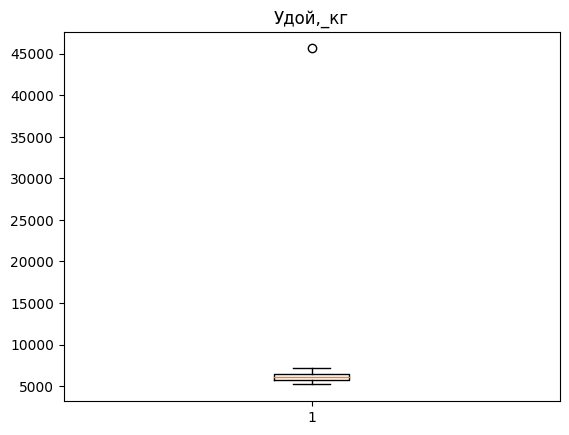

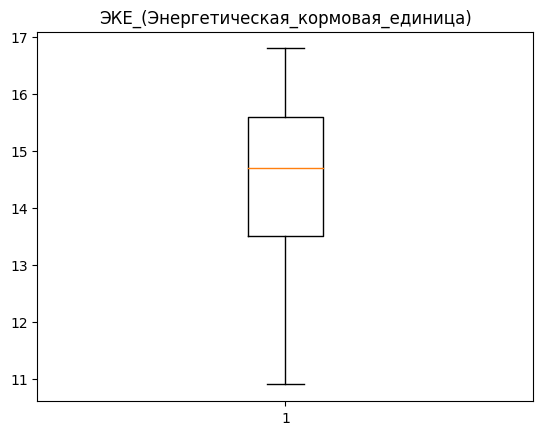

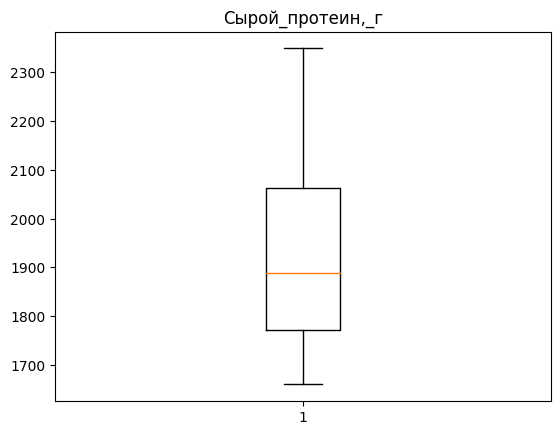

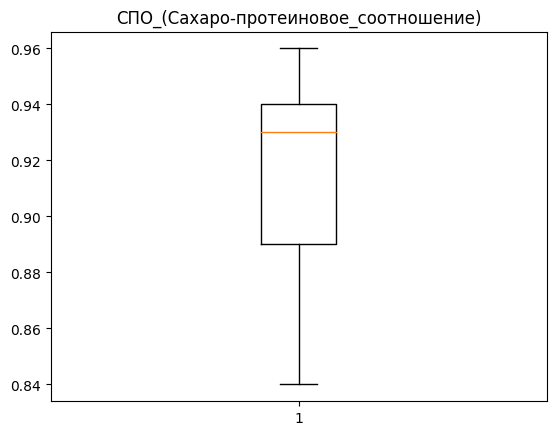

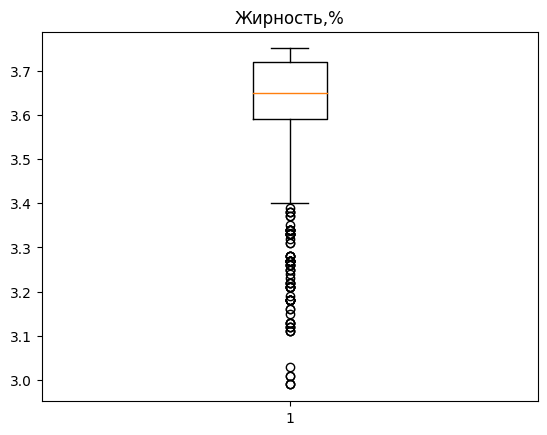

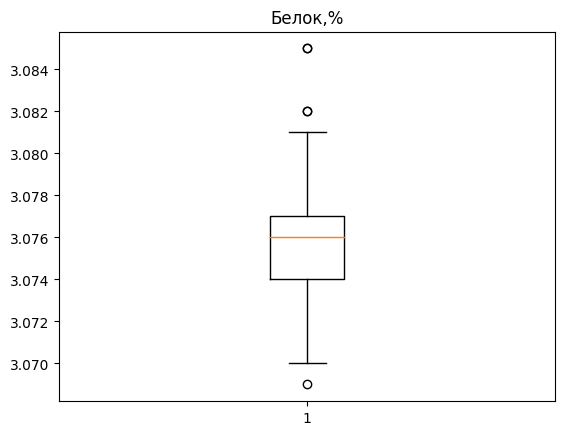

In [186]:
_for = ['Удой,_кг', 'ЭКЕ_(Энергетическая_кормовая_единица)','Сырой_протеин,_г',\
        'СПО_(Сахаро-протеиновое_соотношение)','Жирность,%', 'Белок,%']
for _i in _for:
  plt.boxplot(df_cow[_i])
  plt.title(_i)
  plt.show()

* есть аномальный выброс у `Удой,_кг` надо удалить или поменять на среднее значения или чтото ещё...

In [187]:
df_cow['Удой,_кг'].sort_values()

,"Удой,_кг"
273,5204
397,5207
589,5213
322,5215
578,5235
...,...
294,7197
296,7201
135,7207
70,7222


* похоже у 45616 лишняя 4 в переди уберём её

In [188]:
df_cow.loc[16,'Удой,_кг'] = 5616
df_cow.loc[16,'Удой,_кг']

5616

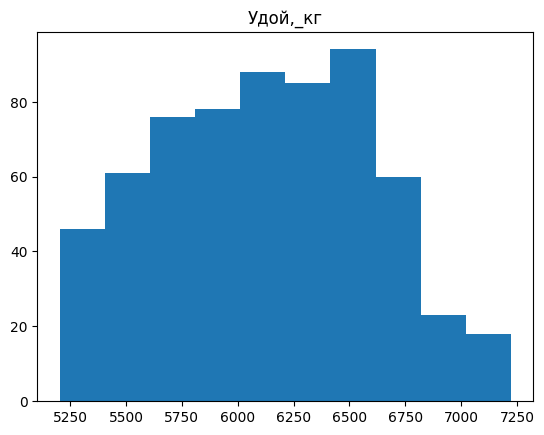

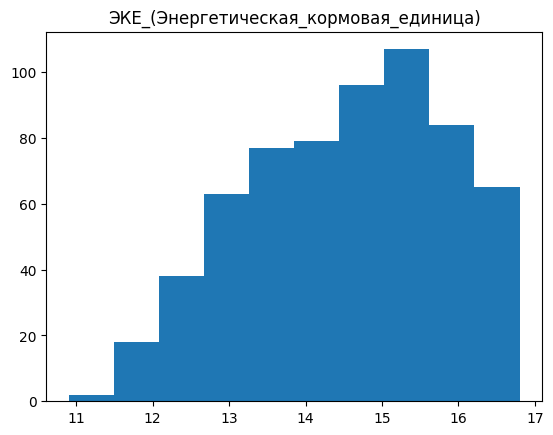

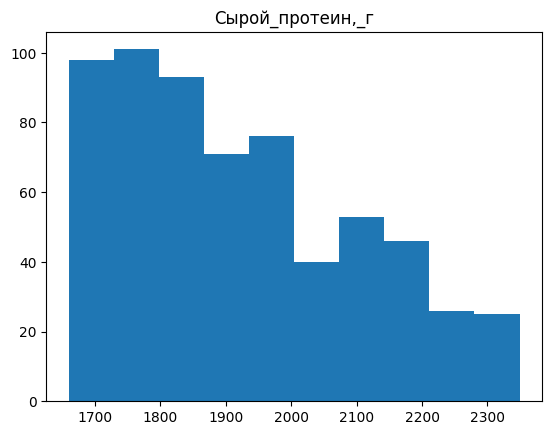

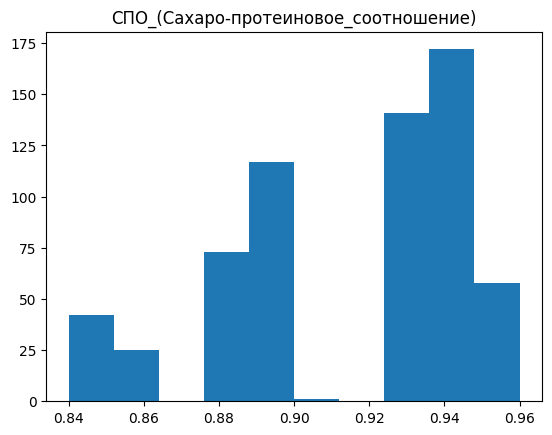

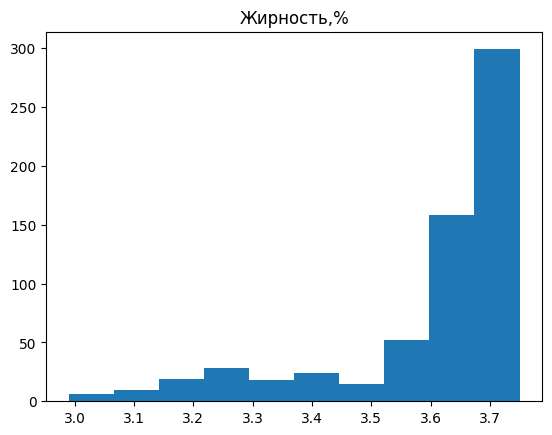

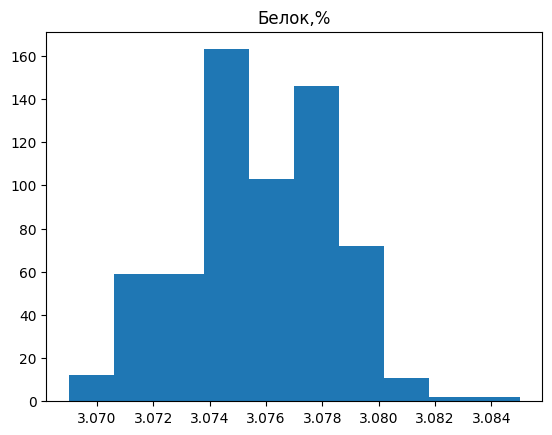

In [189]:
_for = ['Удой,_кг', 'ЭКЕ_(Энергетическая_кормовая_единица)','Сырой_протеин,_г',\
        'СПО_(Сахаро-протеиновое_соотношение)','Жирность,%', 'Белок,%']
for _i in _for:
  plt.hist(df_cow[_i])
  plt.title(_i)
  plt.show()

* показатель СПО не ведёт себя как количественный признак
* он больше пахож на категории

## Корреляционный анализ

In [190]:
df_cow

,id,"Удой,_кг",ЭКЕ_(Энергетическая_кормовая_единица),"Сырой_протеин,_г",СПО_(Сахаро-протеиновое_соотношение),Порода,Тип_пастбища,Порода_папы_быка,"Жирность,%","Белок,%",Вкус_молока,Возраст,Имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,True,True,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,True,False,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,False,True,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,False,True,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,True,False,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,False,True,Буйный
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,True,False,Барин
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,False,True,Барин
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,True,True,Барин


interval columns not set, guessing: ['id', 'Удой,_кг', 'ЭКЕ_(Энергетическая_кормовая_единица)', 'Сырой_протеин,_г', 'СПО_(Сахаро-протеиновое_соотношение)', 'Жирность,%', 'Белок,%']


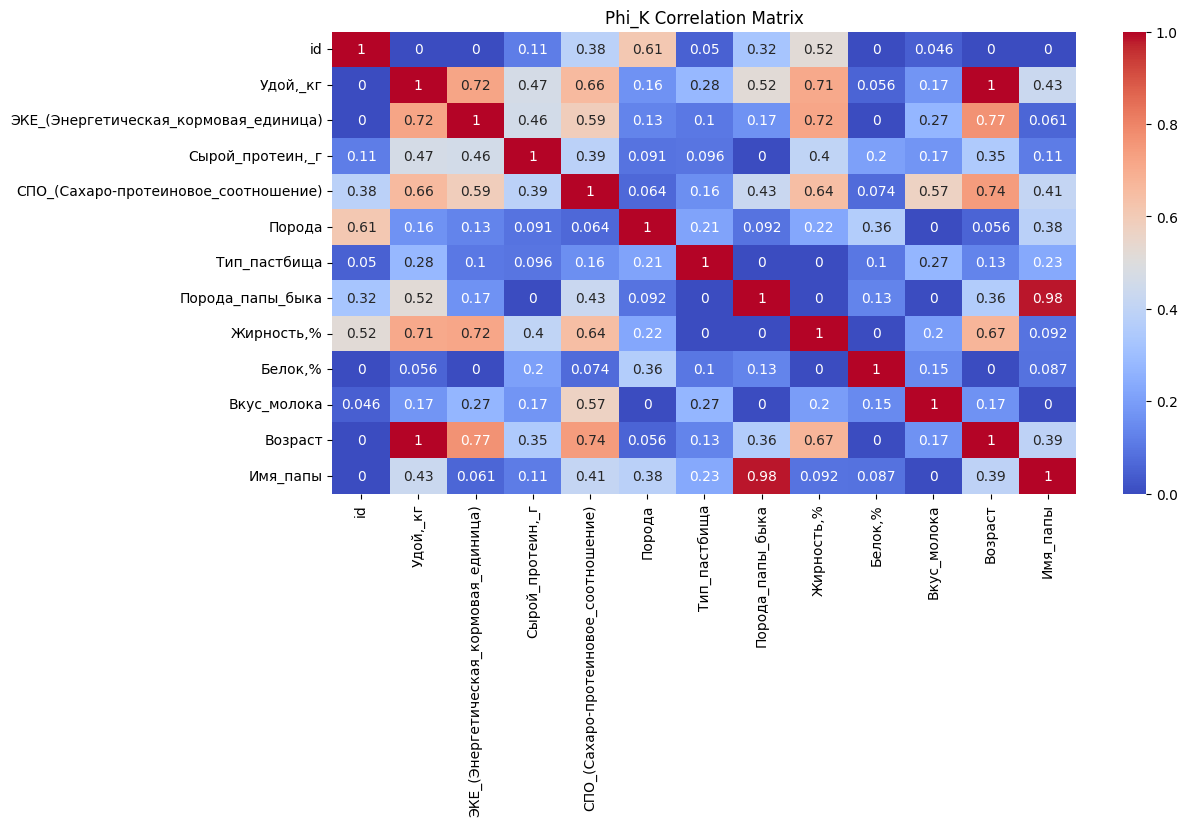

In [191]:
corr_matrix = df_cow.phik_matrix()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

* белок похоже совсем не связан с удоем

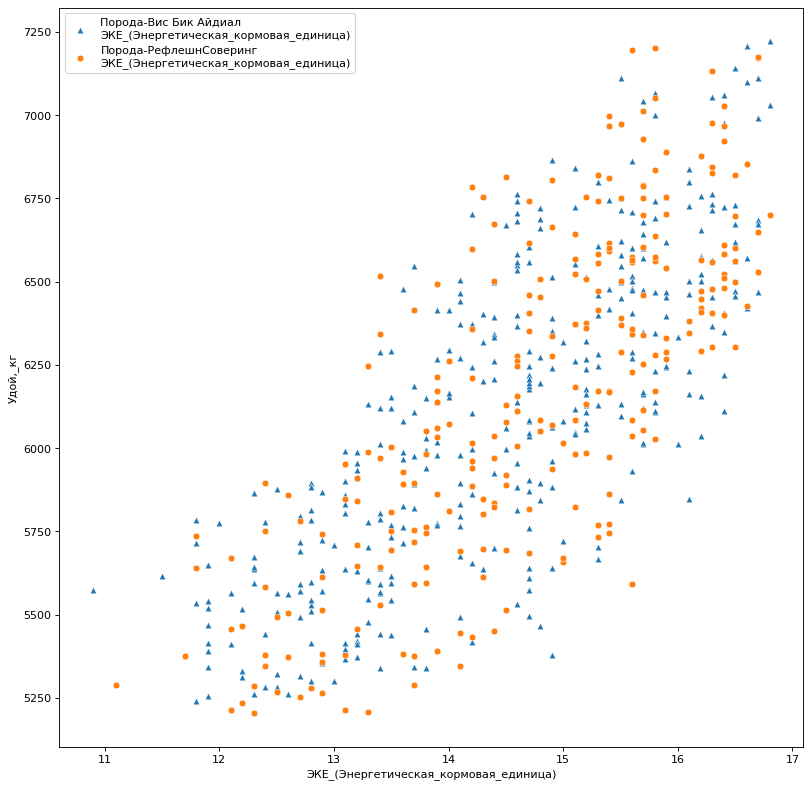

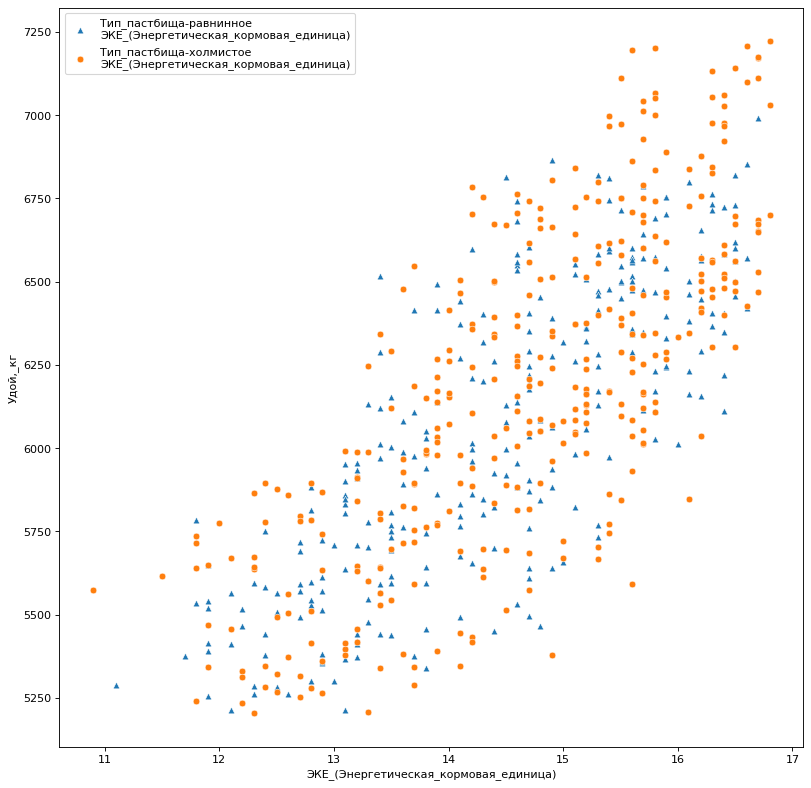

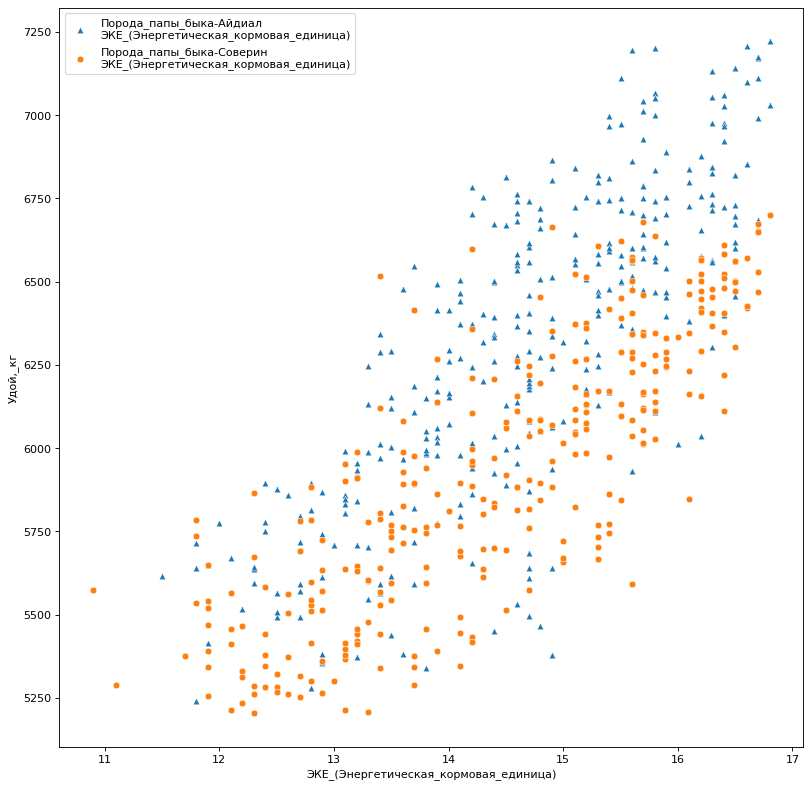

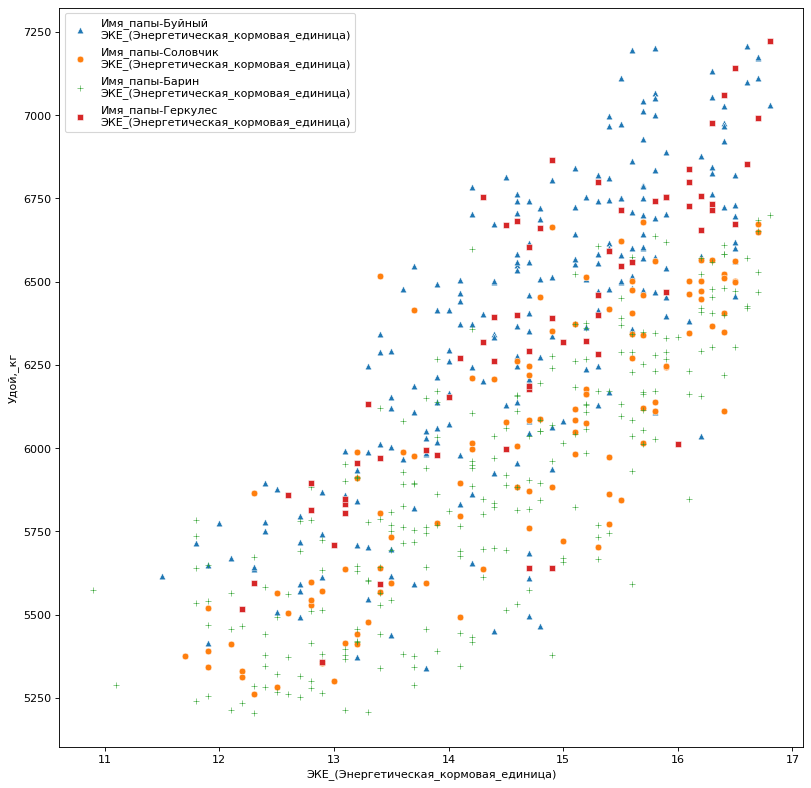

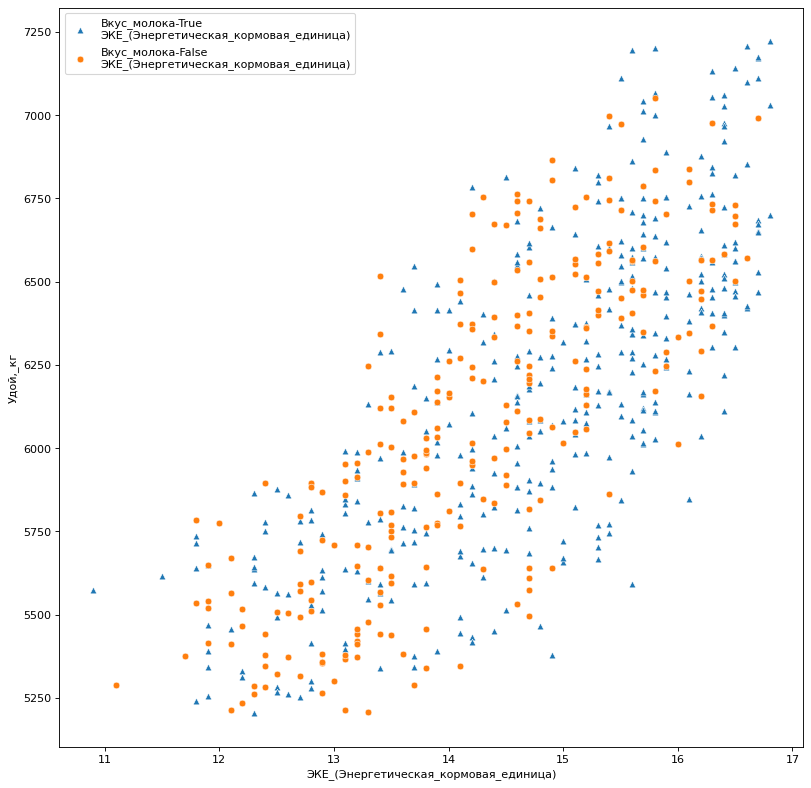

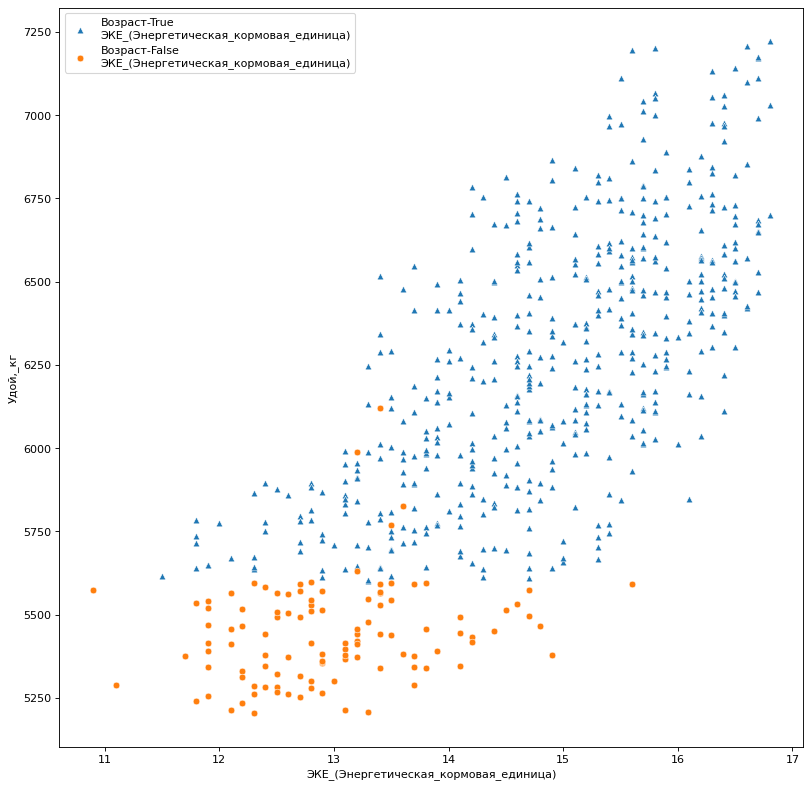

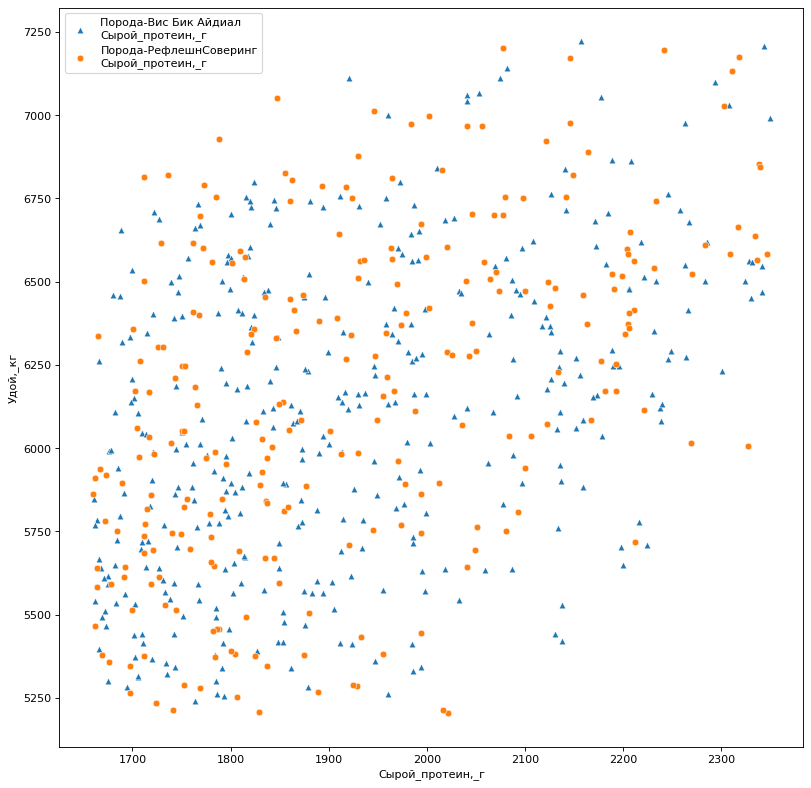

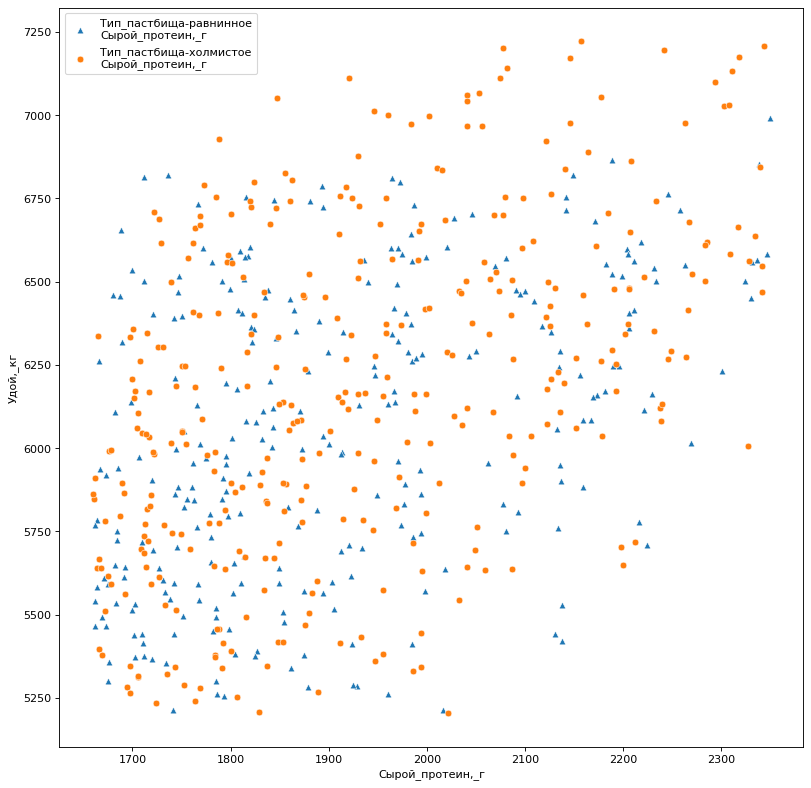

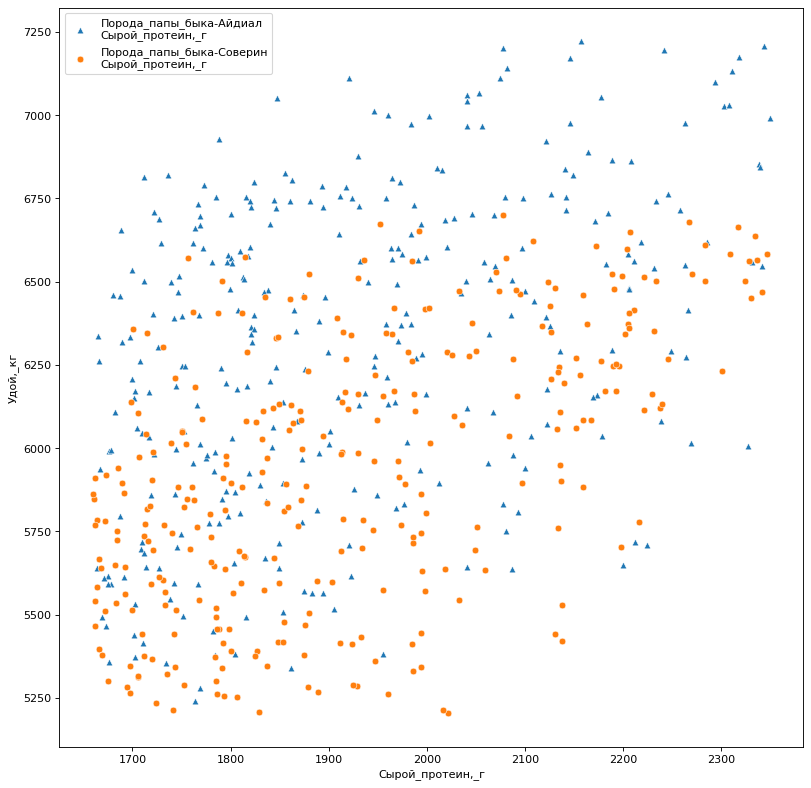

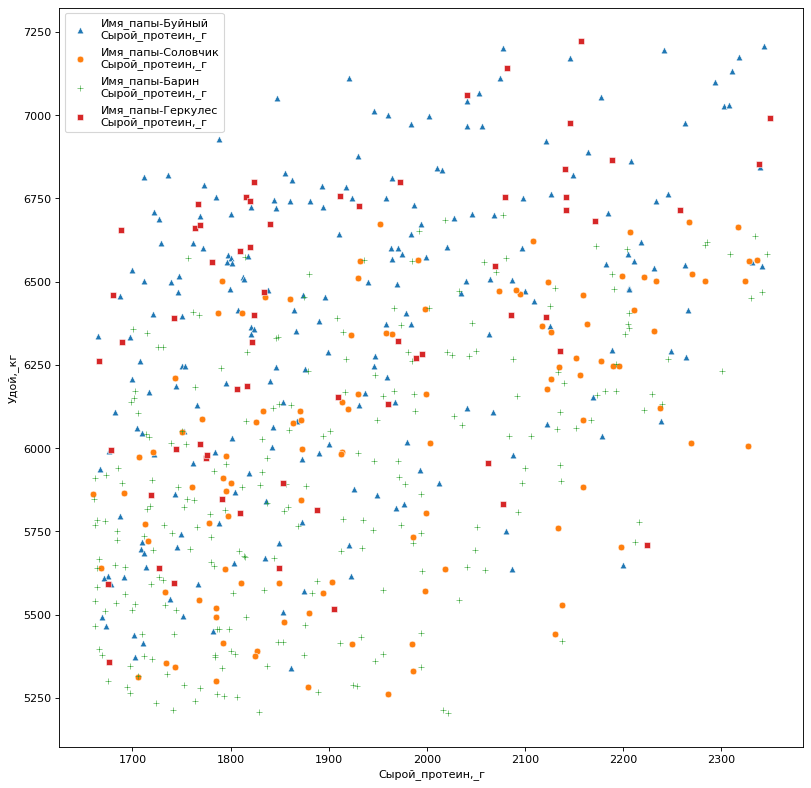

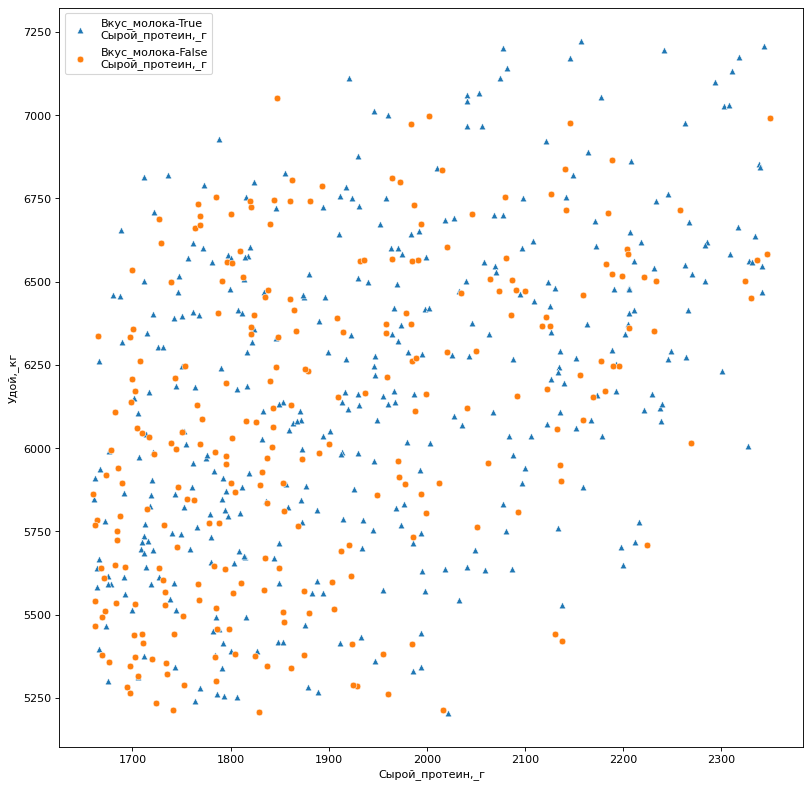

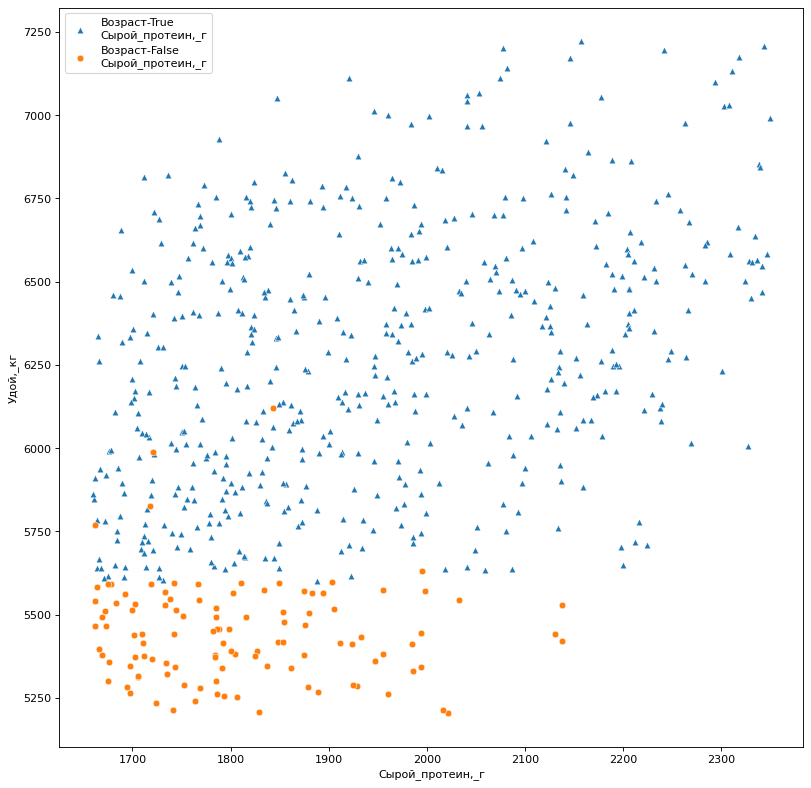

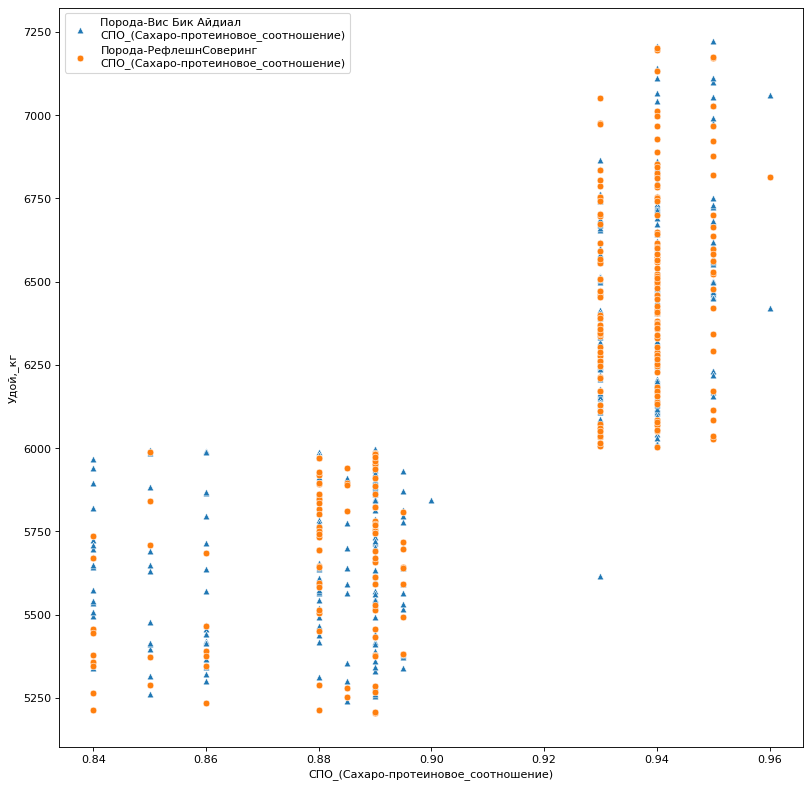

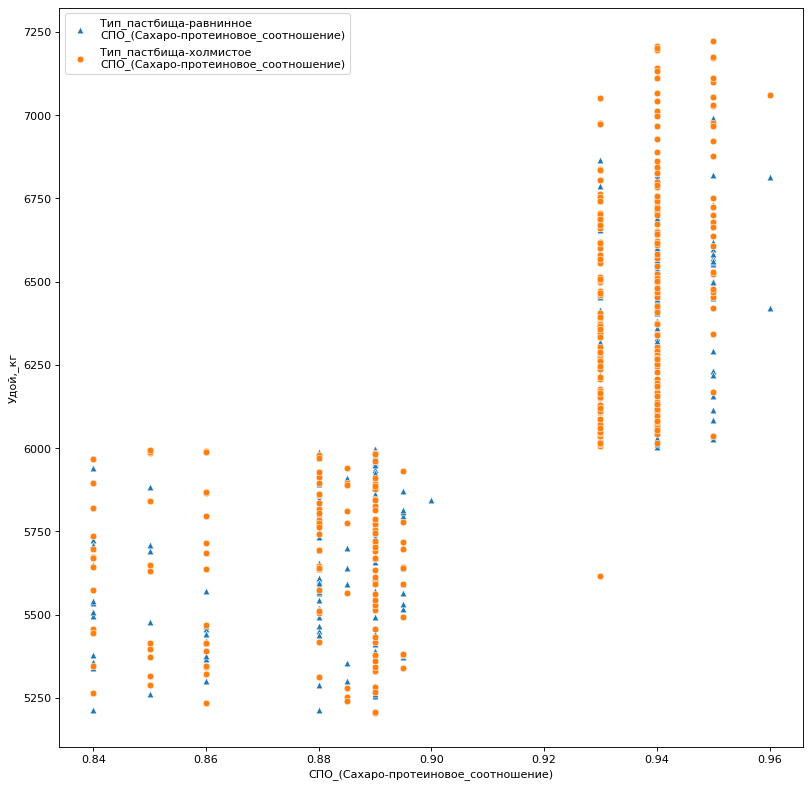

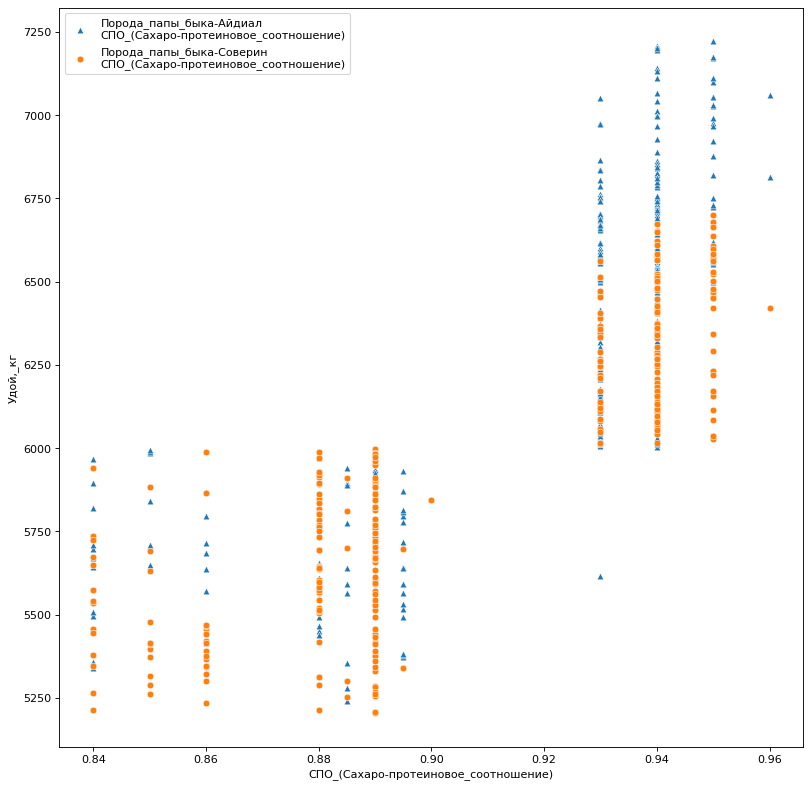

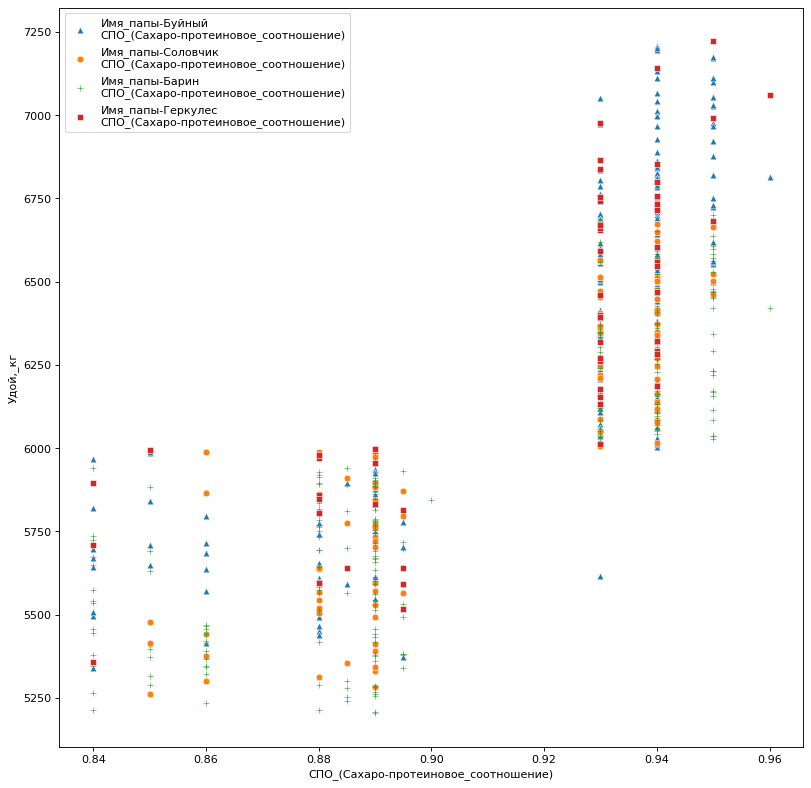

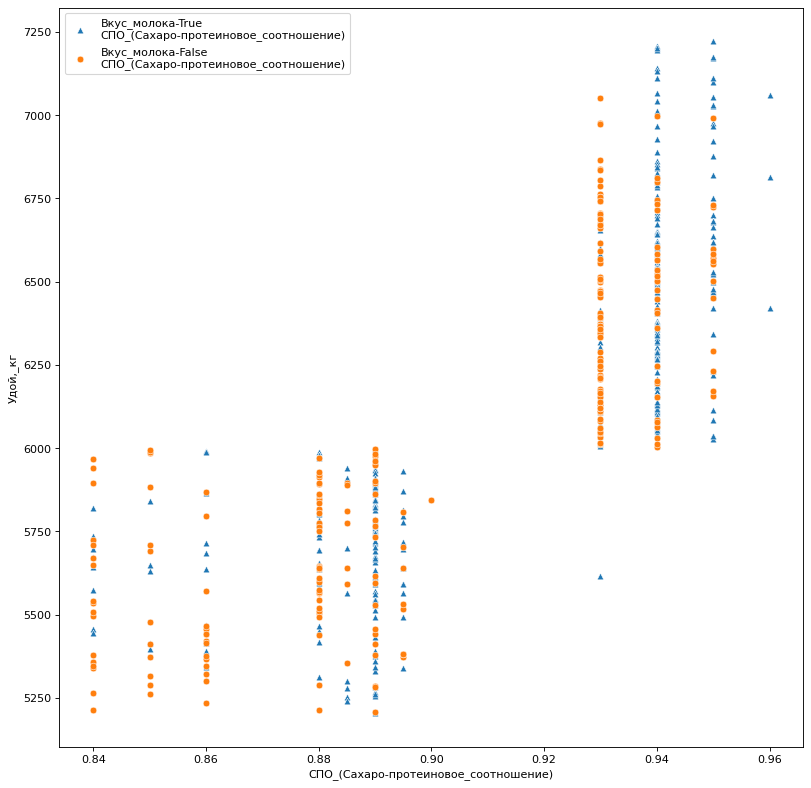

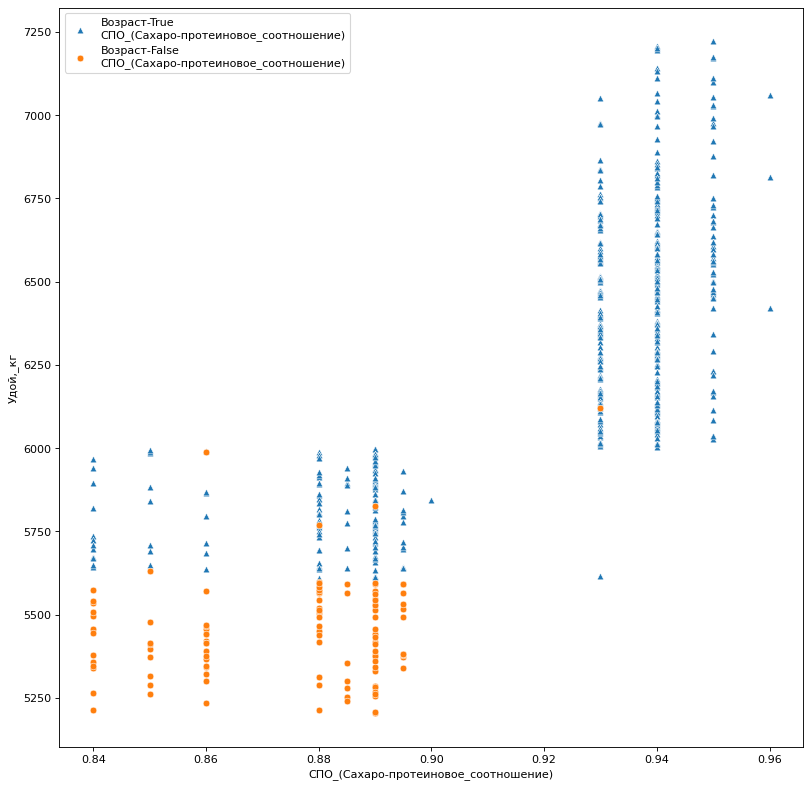

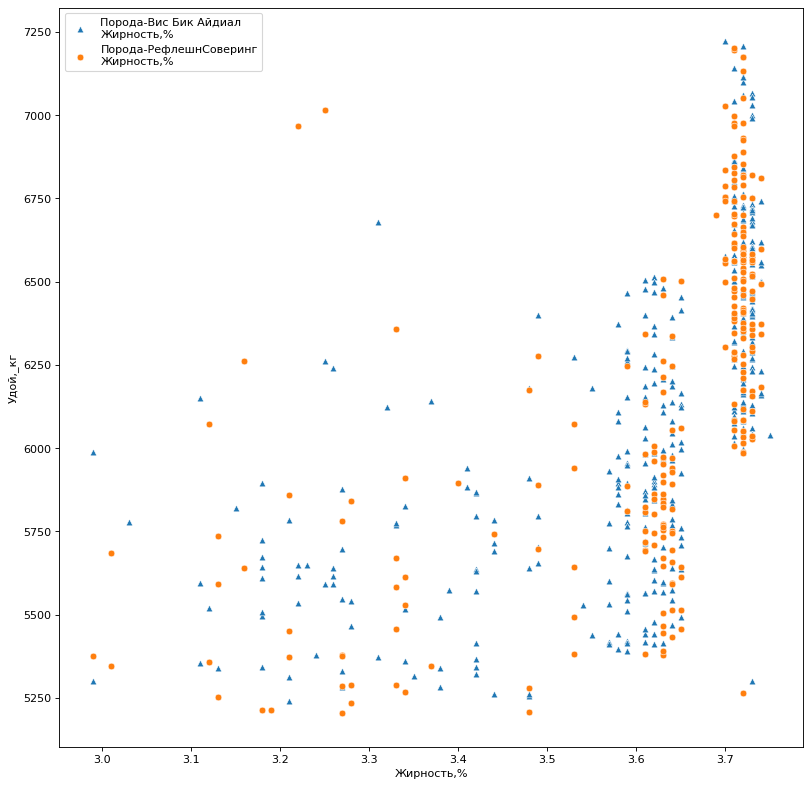

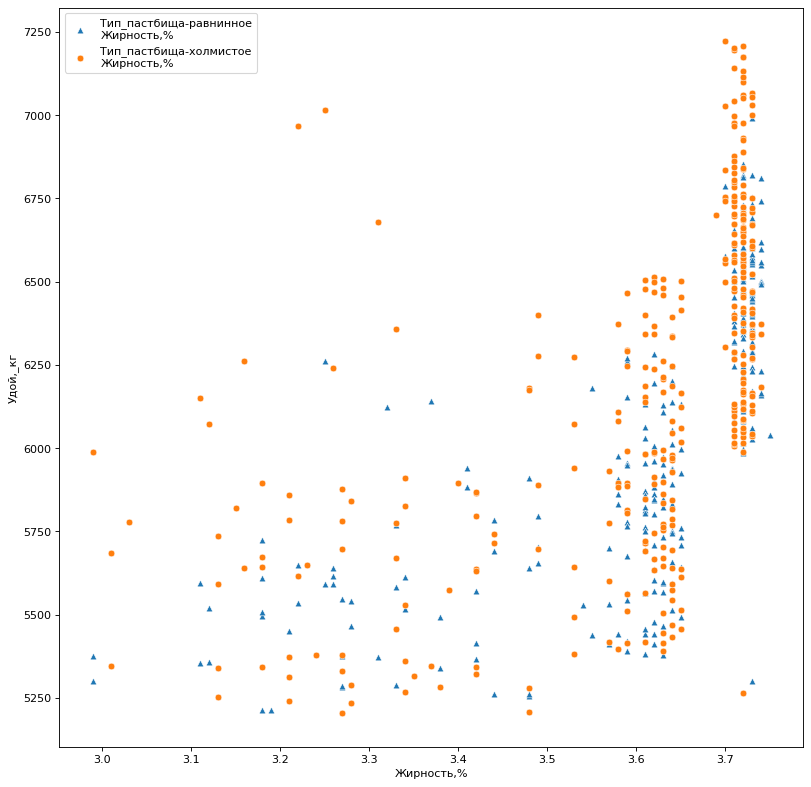

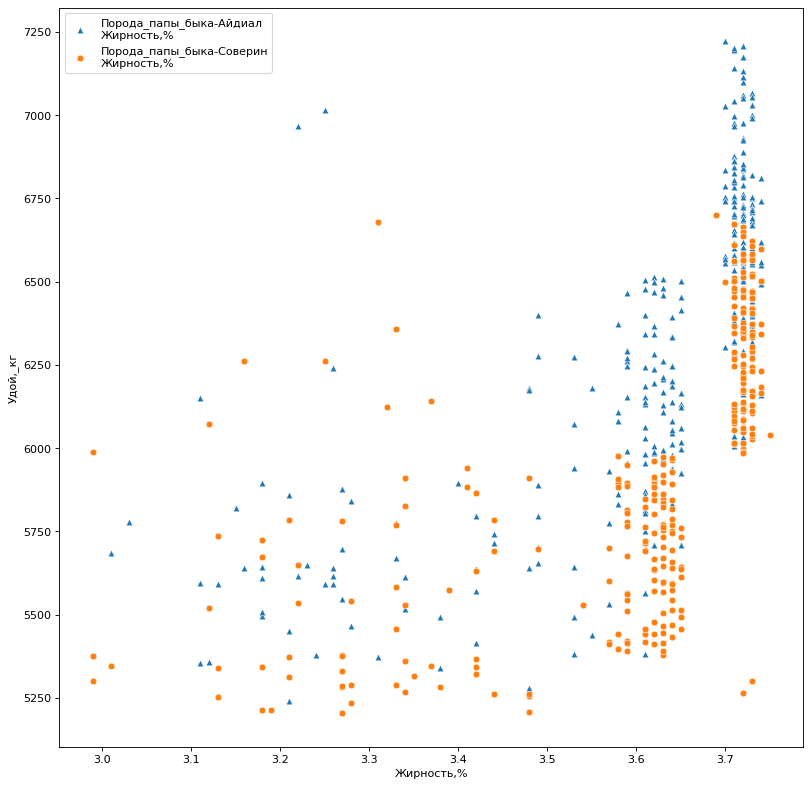

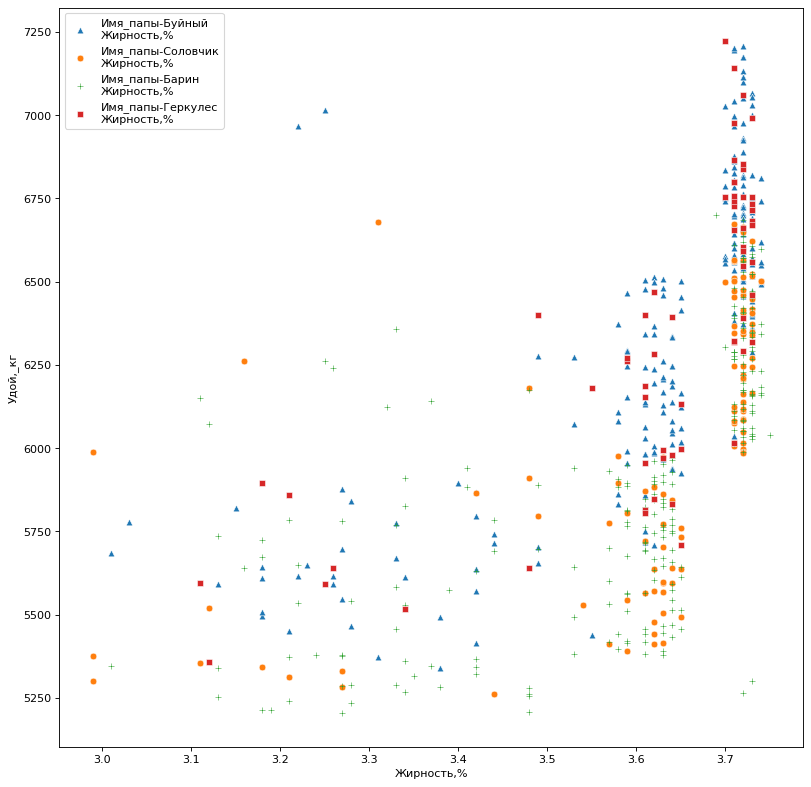

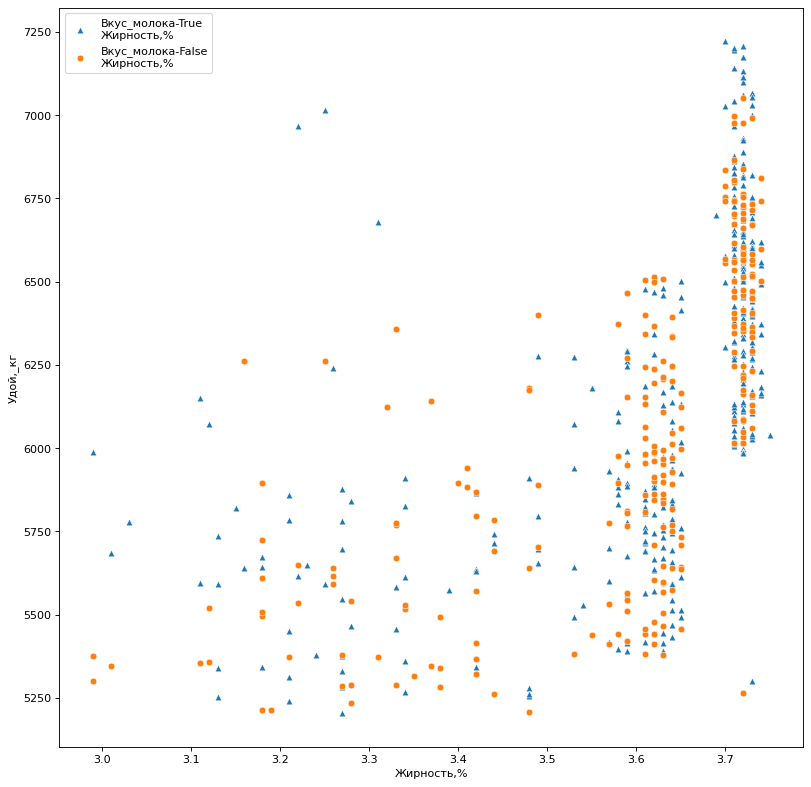

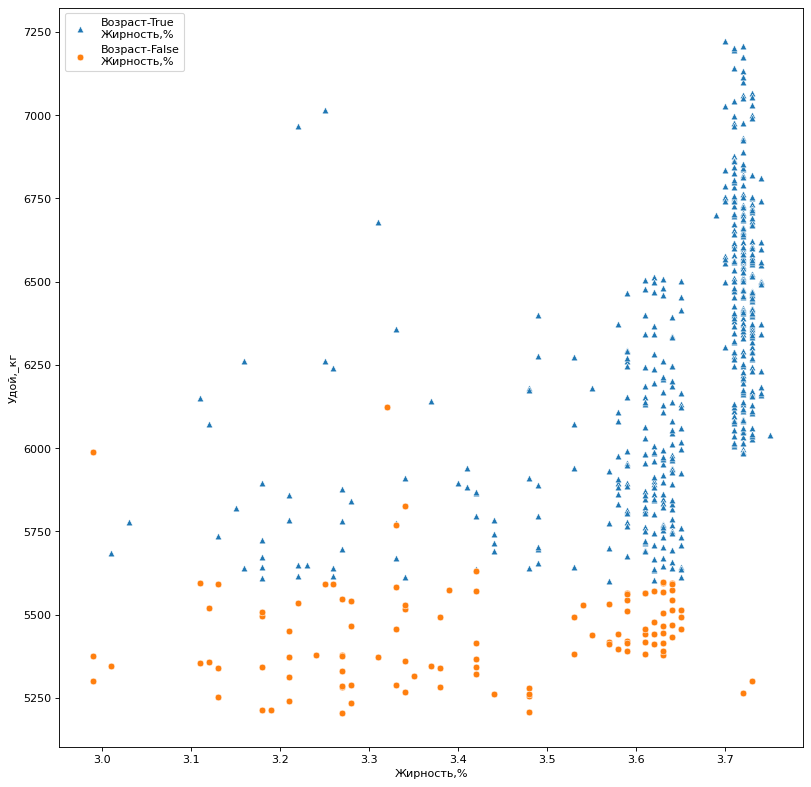

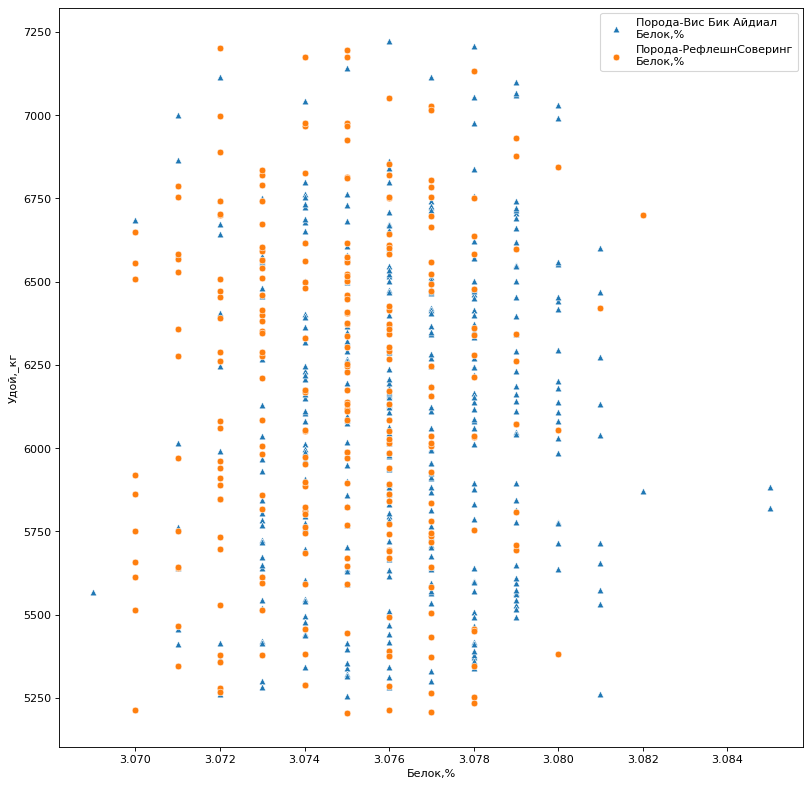

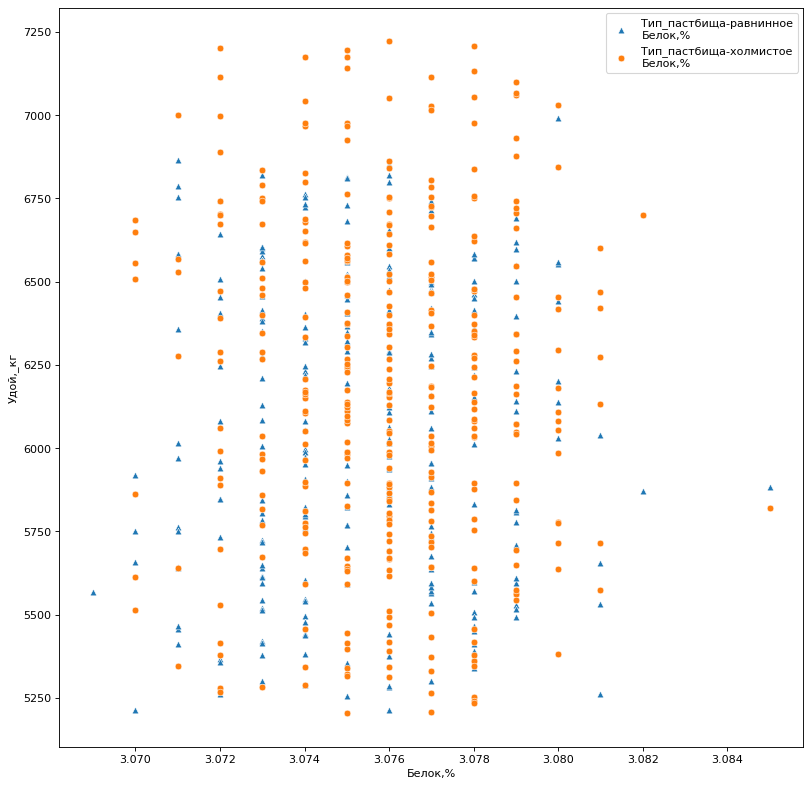

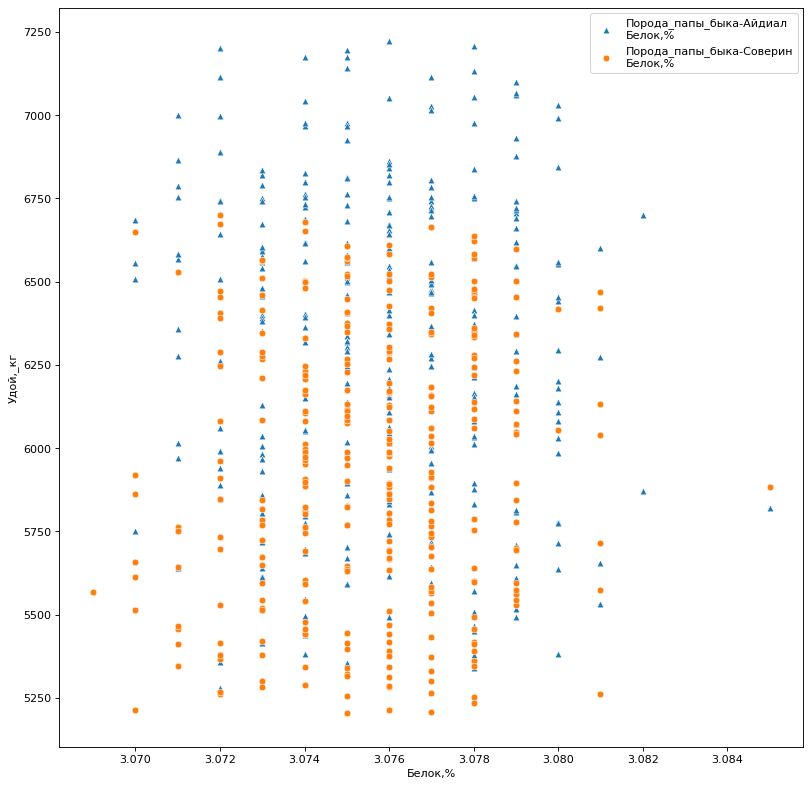

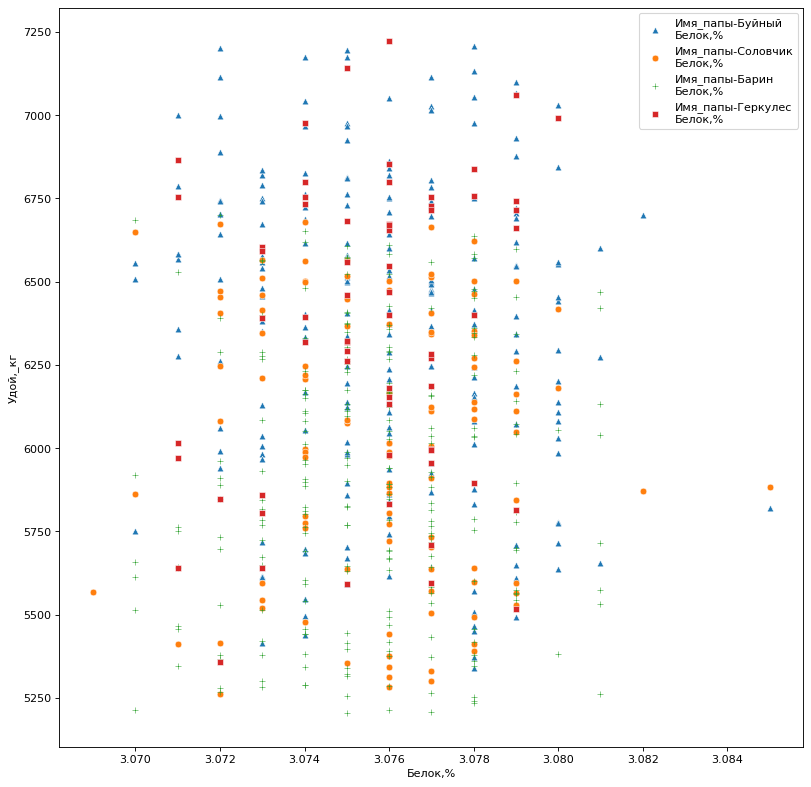

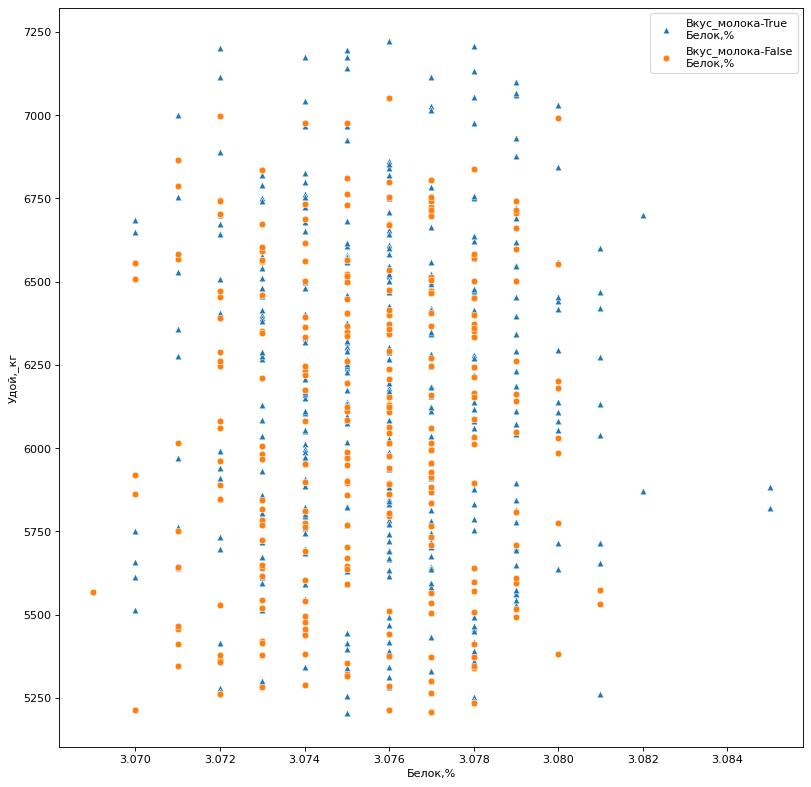

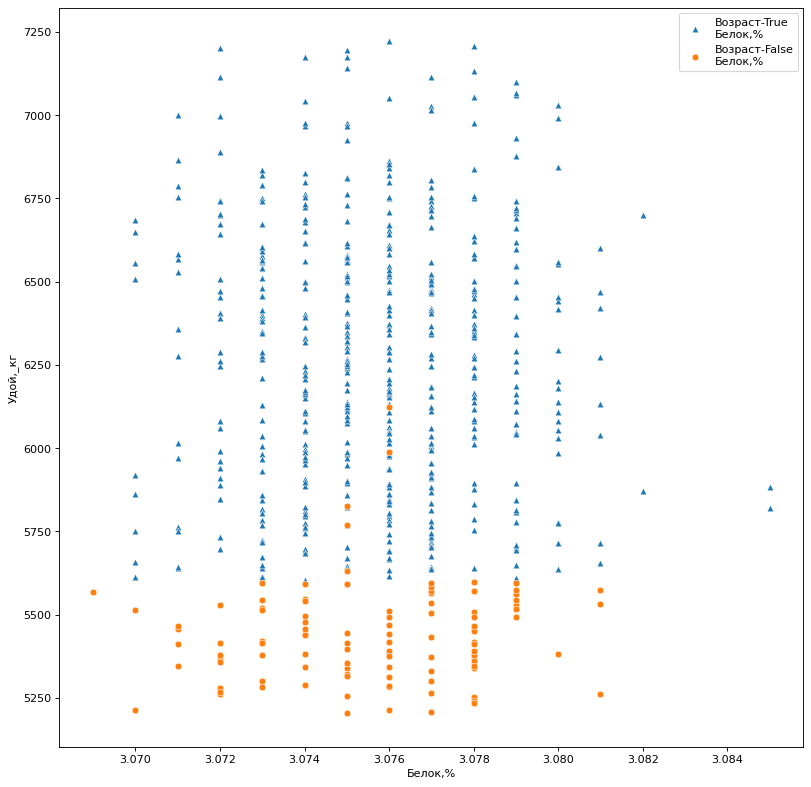

<Figure size 960x960 with 0 Axes>

In [192]:
_x_train = ['ЭКЕ_(Энергетическая_кормовая_единица)','Сырой_протеин,_г',\
 'СПО_(Сахаро-протеиновое_соотношение)','Жирность,%','Белок,%']
_groop = ['Порода','Тип_пастбища','Порода_папы_быка','Имя_папы','Вкус_молока','Возраст']
plt.figure(figsize=(12, 12), dpi=80)
for _x in _x_train:
  for _g in _groop:
    _groop_query = list(df_cow[_g].unique())
    _i_s_s=0
    for _g_q in _groop_query:
      if _g_q in [True,False]:
        _g_df = df_cow.query(f'{_g} == {_g_q}')
      else:
        _g_df = df_cow.query(f'{_g} == "{_g_q}"')
      _i_s = ['^','o','+','s']
      sns.scatterplot( data=_g_df, x=_x, y='Удой,_кг', marker=_i_s[_i_s_s], label = _g + '-' + str(_g_q) + '\n' + _x + '')
      _i_s_s =_i_s_s+1
    plt.show()
    plt.figure(figsize=(12, 12), dpi=80)

* СПО и Удой их диаграмма наблюдения сгруппированы в кластеры
* у молодых коров маленький удой их уже можно не расматривать к покупке
* и у папы Буйный дочки больше других дают молока

## Обучение модели линейной регрессии

### функция milk_yield

In [193]:
def milk_yield(_df,_column_q, _column_c, _column_y):
  X = _df[_column_q + _column_c]
  y = _df[_column_y]
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE)
  # кодируем категориальные данные
  #encoder =  OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
  encoder = OneHotEncoder(drop='first', sparse_output=False)
  X_train_ohe = encoder.fit_transform(X_train[_column_c])
  X_test_ohe = encoder.transform(X_test[_column_c])
  # список новых названий для столбцов
  encoder_col_names = encoder.get_feature_names_out()
  # приводим значения всех признаков к единой шкале
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train[_column_q])
  X_test_scaled = scaler.transform(X_test[_column_q])
  # сабирём все изменённые таблицы вместе
  # категории [0,1]  ['Порода','Тип_пастбища', 'Порода_папы_быка','Имя_папы','Возраст']
  X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
  X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
  # матрица цифры ['Жирность,%','Белок,%']
  X_train_scaled = pd.DataFrame(X_train_scaled, columns=_column_q)
  X_test_scaled = pd.DataFrame(X_test_scaled, columns=_column_q)
  # салянка из категорий и цифр
  X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
  X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
  # ОБУЧЕНИЕ
  model_lr  = LinearRegression()
  model_lr = model_lr.fit(X_train, y_train)
  predictions = model_lr.predict(X_test)
  # Calculation of R2 Score
  display(f'R2 : {r2_score(y_test,  predictions)}')
  display(f'МСЕ : {mean_squared_error(y_test, predictions)}')
  display(f'MAE : {mean_absolute_error(y_test, predictions)}')
  display(f'RМСЕ : {mean_squared_error(y_test, predictions, squared=False)}')
  # анализ остатков
  # остатки
  residuals =  y_test - predictions
  # постром графики по количественным признакам — гистограмму частотности
  # распределения и диаграмму рассеяния
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
  axes[0].hist(residuals, bins=50)
  axes[0].set_title('Гистограмма распределения остатков')
  axes[0].set_xlabel('Остатки')
  axes[1].scatter(x=predictions,y=residuals)
  axes[1].set_xlabel('Предсказания модели')
  axes[1].set_ylabel('Остатки')
  axes[1].set_title('Анализ дисперсии')
  plt.show()
  return [encoder,scaler,model_lr]

### 1 МО

'R2 : 0.8194608020428206'

'МСЕ : 49470.59612102012'

'MAE : 180.7979431174617'

'RМСЕ : 222.4198644928553'

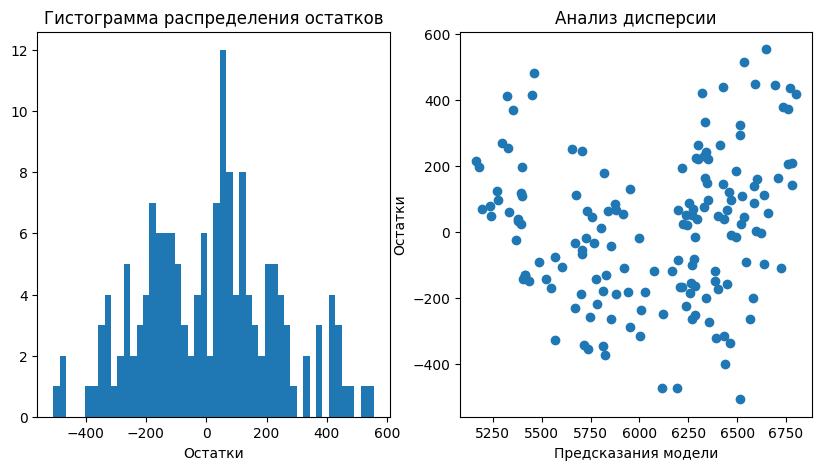

[OneHotEncoder(drop='first', sparse_output=False),
 StandardScaler(),
 LinearRegression()]

In [194]:
_df = copy.copy(df_cow)
_column_q=['ЭКЕ_(Энергетическая_кормовая_единица)','Сырой_протеин,_г',\
            'СПО_(Сахаро-протеиновое_соотношение)']
_column_c=['Порода','Тип_пастбища','Порода_папы_быка','Возраст']
_column_y='Удой,_кг'
milk_yield(_df,_column_q,_column_c,_column_y)

* нелинейное рамприделение остатков

### 2 МО

* преобразуем СПО в категориальный признак
* добавим столбец ЭКЕ в квадрате

'R2 : 0.8523691320309195'

'МСЕ : 40453.19313995323'

'MAE : 160.74367632893257'

'RМСЕ : 201.12979177623893'

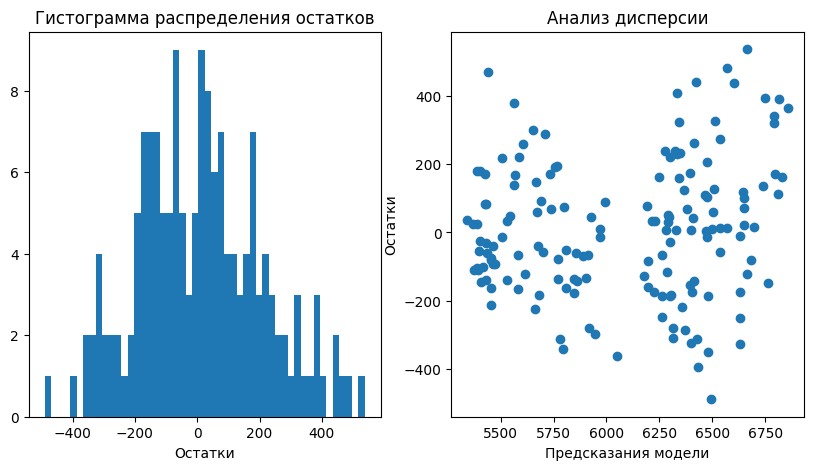

[OneHotEncoder(drop='first', sparse_output=False),
 StandardScaler(),
 LinearRegression()]

In [195]:
_df = copy.copy(df_cow)
_df['СПО_(Сахаро-протеиновое_соотношение)'] = _df['СПО_(Сахаро-протеиновое_соотношение)'].astype('category')
_df['ЭКЕ_(Энергетическая_кормовая_единица)2'] = _df['ЭКЕ_(Энергетическая_кормовая_единица)']**2
_column_q=['ЭКЕ_(Энергетическая_кормовая_единица)','ЭКЕ_(Энергетическая_кормовая_единица)2','Сырой_протеин,_г']
_column_c=['Порода','Тип_пастбища','Порода_папы_быка','Возраст','СПО_(Сахаро-протеиновое_соотношение)']
_column_y='Удой,_кг'
milk_yield(_df,_column_q,_column_c,_column_y)

* показатели и правдо улутчелись

### 3 МО

'R2 : 0.8665528923313226'

'МСЕ : 36566.61845014526'

'MAE : 153.08249102218556'

'RМСЕ : 191.22400071681707'

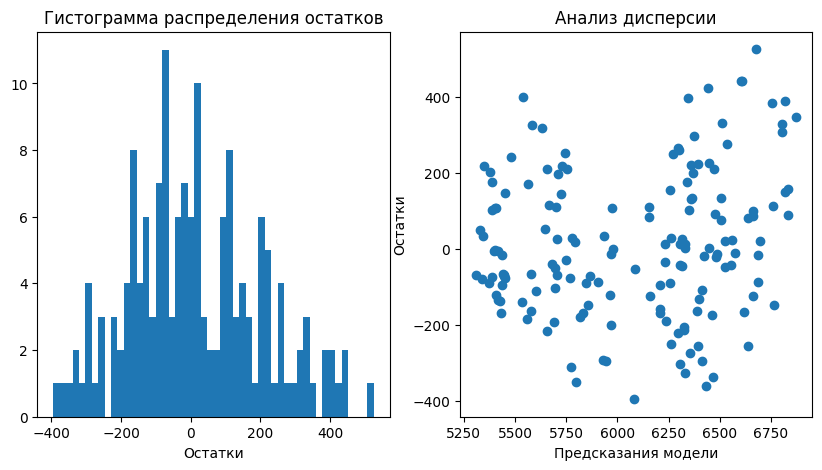

In [196]:
_df = copy.copy(df_cow)
_df['СПО_(Сахаро-протеиновое_соотношение)'] = _df['СПО_(Сахаро-протеиновое_соотношение)'].astype('category')
_df['ЭКЕ_(Энергетическая_кормовая_единица)2'] = _df['ЭКЕ_(Энергетическая_кормовая_единица)']**2
_column_q=['ЭКЕ_(Энергетическая_кормовая_единица)','ЭКЕ_(Энергетическая_кормовая_единица)2','Сырой_протеин,_г']
_column_c=['Порода','Возраст','СПО_(Сахаро-протеиновое_соотношение)','Имя_папы','Тип_пастбища']
_column_y='Удой,_кг'
_enc_skal_model = milk_yield(_df,_column_q,_column_c,_column_y)

* похоже гены папы улутчели показатели модели

### предсказание

#### функция `milk_yield_buy`

In [197]:
def milk_yield_buy(x_buy):
  encoder = _enc_skal_model[0]
  scaler  = _enc_skal_model[1]
  model_lr  = _enc_skal_model[2]

  ##X = _df[_column_q + _column_c]
  ##y = _df[_column_y]
  ##X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE)
  X_test = copy.copy(x_buy[_column_q + _column_c])
  # кодируем категориальные данные
  ##encoder = OneHotEncoder(drop='first', sparse=False)
  ##X_train_ohe = encoder.fit_transform(X_train[_column_c])
  X_test_ohe = encoder.transform(X_test[_column_c])
  # список новых названий для столбцов
  encoder_col_names = encoder.get_feature_names_out()
  # приводим значения всех признаков к единой шкале
  ##scaler = StandardScaler()
  ##X_train_scaled = scaler.fit_transform(X_train[_column_q])
  X_test_scaled = scaler.transform(X_test[_column_q])
  # сабирём все изменённые таблицы вместе
  # категории [0,1]  ['Порода','Тип_пастбища', 'Порода_папы_быка','Имя_папы','Возраст']
  ##X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
  X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
  # матрица цифры ['Жирность,%','Белок,%']
  ##X_train_scaled = pd.DataFrame(X_train_scaled, columns=_column_q)
  X_test_scaled = pd.DataFrame(X_test_scaled, columns=_column_q)
  # салянка из категорий и цифр
  ##X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
  X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
  # ОБУЧЕНИЕ
  ##model_lr  = LinearRegression()
  ##model_lr = model_lr.fit(X_train, y_train)
  predictions = model_lr.predict(X_test)
  predictions = pd.Series(predictions)
  x_buy = x_buy.reset_index(drop= True)#'более_2_лет', 'менее_2_лет'
  x_buy['Возраст'] = x_buy['Возраст'].apply(lambda x: 'более_2_лет' if x == True else 'менее_2_лет' )
  X_test = pd.concat([x_buy[df_buy.columns], predictions],axis=1)
  X_test.columns = ['Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Имя_папы', 'Жирность,%','Белок,%', 'Возраст','Предсказанный_удой']
  return X_test

### подкатовка данных

In [198]:
_df_buy = copy.copy(df_buy)
# добавим 20 % к медианному значению СПО_(Сахаро-протеиновое_соотношение)
_category = df_cow['СПО_(Сахаро-протеиновое_соотношение)'].median()+(df_cow['СПО_(Сахаро-протеиновое_соотношение)'].median()/20)
# так-как это категории надо найти подходящие значения чтоб оно было как в тренированной модели так и в df_buy
for _i in  sorted(df_cow['СПО_(Сахаро-протеиновое_соотношение)'].unique()):
    if _category > _i:
        _df_buy['СПО_(Сахаро-протеиновое_соотношение)'] = _i
_df_buy['СПО_(Сахаро-протеиновое_соотношение)_категории'] = _df_buy['СПО_(Сахаро-протеиновое_соотношение)'].astype('category')
_df_buy['ЭКЕ_(Энергетическая_кормовая_единица)'] = df_cow['ЭКЕ_(Энергетическая_кормовая_единица)'].mean()+(df_cow['ЭКЕ_(Энергетическая_кормовая_единица)'].mean()/20)
_df_buy['ЭКЕ_(Энергетическая_кормовая_единица)2'] = df_cow['ЭКЕ_(Энергетическая_кормовая_единица)']**2
_df_buy['Сырой_протеин,_г'] = df_cow['Сырой_протеин,_г'].mean()+(df_cow['Сырой_протеин,_г'].mean()/20)
_df_buy.head(5)

,Порода,Тип_пастбища,Порода_папы_быка,Имя_папы,"Жирность,%","Белок,%",Возраст,СПО_(Сахаро-протеиновое_соотношение),СПО_(Сахаро-протеиновое_соотношение)_категории,ЭКЕ_(Энергетическая_кормовая_единица),ЭКЕ_(Энергетическая_кормовая_единица)2,"Сырой_протеин,_г"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,True,0.96,0.96,15.271073,201.64,2019.532273
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,False,0.96,0.96,15.271073,163.84,2019.532273
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,True,0.96,0.96,15.271073,196.00,2019.532273
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,True,0.96,0.96,15.271073,153.76,2019.532273
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,True,0.96,0.96,15.271073,163.84,2019.532273


### старт

In [199]:
# фрэйм для обучения
# коровы для предсказания
x_buy = copy.copy(_df_buy)
df_final_buy = milk_yield_buy(x_buy)
display(df_final_buy.query('Предсказанный_удой > 6000'))

,Порода,Тип_пастбища,Порода_папы_быка,Имя_папы,"Жирность,%","Белок,%",Возраст,Предсказанный_удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6166.113918
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6391.262482
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,7565.609440
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,6873.076531
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6972.553069
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,7040.711363
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,6996.320574
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6210.793338


## Обучение модели логистической регрессии

#### функция `milk_yield_buy`

In [200]:
def milk_taste(_df,_column_q, _column_c, _column_y):
  X = _df[_column_q + _column_c]
  y = _df[_column_y]
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE)
  # кодируем категориальные данные
  encoder = OneHotEncoder(drop='first', sparse_output=False)
  X_train_ohe = encoder.fit_transform(X_train[_column_c])
  X_test_ohe = encoder.transform(X_test[_column_c])
  # список новых названий для столбцов
  encoder_col_names = encoder.get_feature_names_out()
  # приводим значения всех признаков к единой шкале
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train[_column_q])
  X_test_scaled = scaler.transform(X_test[_column_q])
  # сабирём все изменённые таблицы вместе
  # категории [0,1]  ['Порода','Тип_пастбища', 'Порода_папы_быка','Имя_папы','Возраст']
  X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
  X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
  # матрица цифры ['Жирность,%','Белок,%']
  X_train_scaled = pd.DataFrame(X_train_scaled, columns=_column_q)
  X_test_scaled = pd.DataFrame(X_test_scaled, columns=_column_q)
  # салянка из категорий и цифр
  X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
  X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
  # ОБУЧЕНИЕ
  clf = LogisticRegression()
  clf = clf.fit(X_train, y_train)
  predictions = clf.predict(X_test)
  # выведим логарифмическое отношения шансов
  for feature_number, feature_name in enumerate(X.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    display(f"{feature_name:<20}: {exp_weight:+.2f}")
  #
  cm = confusion_matrix(y_test, predictions)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
  plt.show()
  plt.ylabel('Истенные')
  plt.xlabel('Предсказанные');
  acc = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions )#, pos_label='вкусно')
  recall = recall_score(y_test, predictions)#, pos_label='не вкусно')
  display('---------------------------------------------------------')
  display(f'acc : {acc}')
  display(f'precision : {precision}')
  display(f'recall : {recall}')

  # выбираем оценки только для класса "молоко вкусное"
  y_proba = clf.predict_proba(X_test)[:,1]
  _df_predict_proba = pd.DataFrame(zip(y_test, y_proba),
               columns = ['Вкус_молока', 'y_proba'], index=y_test.index) #.sort_values(by='y_proba',ascending=False)
  #раздробим порог значемости
  thresholds = [round(i,2) for i in np.linspace(0.1,0.9,num = 25,endpoint=False)]
  for i in thresholds:
    _df_predict_proba['y_pred_'+str(i)] = _df_predict_proba['y_proba'].apply(lambda x: False if x < i else True)
  #поля в новой таблицы с порогамим содержащие предсказания
  precision = []
  for i in _df_predict_proba.columns[2:]:
      prec = precision_score(_df_predict_proba['Вкус_молока'], _df_predict_proba[i])
      precision.append(prec)
  _df_max = _df_predict_proba[_df_predict_proba.columns[precision.index(max(precision))+2]]
  cm = confusion_matrix(y_test, _df_max)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
  plt.show()
  #выведим значения метрик
  acc = accuracy_score(y_test, _df_max)
  precision = precision_score(y_test, _df_max)#, pos_label='вкусно')
  recall = recall_score(y_test, _df_max)#, pos_label='не вкусно')
  display('---------------------------------------------------------')
  display(f'уровень порога значимости :{_df_max.name}')
  display(f'acc : {acc}')
  display(f'precision : {precision}')
  display(f'recall : {recall}')
  return [encoder,scaler,clf]

### 1 МО

'ЭКЕ_(Энергетическая_кормовая_единица): +0.75'

'СПО_(Сахаро-протеиновое_соотношение): +0.91'

'Сырой_протеин,_г    : +0.67'

'Жирность,%          : +0.60'

'Порода              : +0.79'

'Возраст             : +0.58'

'Порода_папы_быка    : +0.76'

'Имя_папы            : +0.96'

'СПО_(Сахаро-протеиновое_соотношение)_категории: +0.90'

'Тип_пастбища        : +0.72'

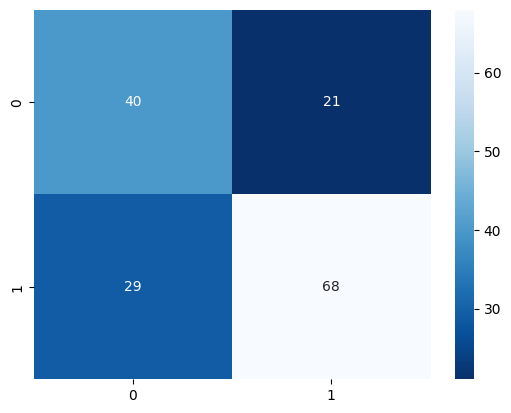

'---------------------------------------------------------'

'acc : 0.6835443037974683'

'precision : 0.7640449438202247'

'recall : 0.7010309278350515'

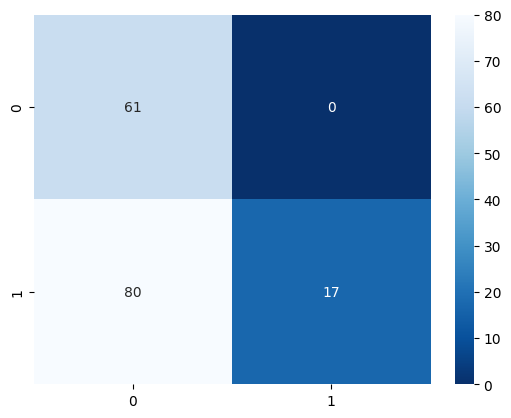

'---------------------------------------------------------'

'уровень порога значимости :y_pred_0.87'

'acc : 0.4936708860759494'

'precision : 1.0'

'recall : 0.17525773195876287'

In [201]:
_df = copy.copy(df_cow)
#_df['Белок,%_категории'] = _df['Белок,%'].astype('category')
_df['СПО_(Сахаро-протеиновое_соотношение)_категории'] = _df['СПО_(Сахаро-протеиновое_соотношение)'].astype('category')
_df['ЭКЕ_(Энергетическая_кормовая_единица)2'] = _df['ЭКЕ_(Энергетическая_кормовая_единица)']**2
_column_q=['ЭКЕ_(Энергетическая_кормовая_единица)','СПО_(Сахаро-протеиновое_соотношение)','Сырой_протеин,_г','Жирность,%']
_column_c=['Порода','Возраст', 'Порода_папы_быка','Имя_папы','СПО_(Сахаро-протеиновое_соотношение)_категории','Тип_пастбища']
_column_y='Вкус_молока'

_enc_skal_clf = milk_taste(_df,_column_q,_column_c,_column_y)

* если уровень порога значимости выбрать 0.89 то мы получим precision = 100 % точнсь предсказания что молоко вкусное
* с уровнем порога значимости 0.5 имеем precision = 0.75 точнст предсказания что молоко вкусное
* может если будет больше коров в исходных данных модель будет точнее

### предсказание

#### функция `milk_taste_buy`

In [202]:
def milk_taste_buy(x_buy):
  encoder = _enc_skal_clf[0]
  scaler  = _enc_skal_clf[1]
  clf  = _enc_skal_clf[2]

  X_test = copy.copy(x_buy[_column_q + _column_c])
  # кодируем категориальные данные
  X_test_ohe = encoder.transform(X_test[_column_c])
  # список новых названий для столбцов
  encoder_col_names = encoder.get_feature_names_out()
  # приводим значения всех признаков к единой шкале
  X_test_scaled = scaler.transform(X_test[_column_q])
  # сабирём все изменённые таблицы вместе
  # категории [0,1]  ['Порода','Тип_пастбища', 'Порода_папы_быка','Имя_папы','Возраст']
  X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
  # матрица цифры ['Жирность,%','Белок,%']
  X_test_scaled = pd.DataFrame(X_test_scaled, columns=_column_q)
  # салянка из категорий и цифр
  X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
  # ОБУЧЕНИЕ
  x_buy = x_buy.reset_index(drop= True)
  y_proba = clf.predict_proba(X_test)[:,1]
  y_proba = pd.Series(y_proba)
  x_buy['Возраст'] = x_buy['Возраст'].apply(lambda x: 'более_2_лет' if x == True else 'менее_2_лет' )
  X_test = pd.concat([df_final_buy, y_proba],axis=1)
  X_test.columns = ['Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Имя_папы', 'Жирность,%','Белок,%', 'Возраст','Предсказанный_удоя','Предсказанный_вкус_молока']
  return X_test

### старт

In [203]:

x_buy = copy.copy(_df_buy)
df_final = milk_taste_buy(x_buy)
display(df_final.query('Предсказанный_удоя > 6000 and Предсказанный_вкус_молока > 0.87'))

,Порода,Тип_пастбища,Порода_папы_быка,Имя_папы,"Жирность,%","Белок,%",Возраст,Предсказанный_удоя,Предсказанный_вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6166.113918,0.937576
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,6873.076531,0.931193
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,7040.711363,0.910778


* использовал порог 0.87 точность предсказания что молоку вкусное типерь достаточная
* но похоже что 3 коровы купить можно с минимальными рисками

## Итоговые выводы

* **Модель обучилась на 629ти коровам по которым фермер вёл статистику**
- отобрал 3 коровы из 20ти коров представленной таблицы у них шанс получить годовой удой выше 6 т. составляет 87 % и то что молоко будет вкусное больше 99 %.

- рекомендую покупать коров старше 2х лет, у них точно удой будет выше.

- как можно больше вести данных по коровам особенно по родословной лини, влияния папы очень сильное может вести учёт всех мам.

* **Были использованы две модели линейная и логическая регрессия, для уличения качества было использовано:**

- нормализация данных (сдвинули их так, чтобы среднее значение было равно нулю, а разброс равнялся 1 стандартному отклонению) с помощью tandardScaler

- преобразовали категориальные данные в переменные с помощью OneHotEncoding

- похоже улучить данную модель можно если провести трансформацию жирности молока в корреляционный тип.

- Accuracy, Precision, Recall метрики которые помогают увеличить вероятность предсказания определённого класса, например чтобы не упустить шанс выгодного вложения или наоборот не потерять то что имеешь.

In [204]:
'End'

'End'